In [1]:
# packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from langdetect import detect
from nltk.corpus import stopwords
from nltk.sentiment.vader import SentimentIntensityAnalyzer
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
# loading datasets
df_clean_list = pd.read_csv("C:/Users/giese/Desktop/outros_projetos/Projetos-python/airbnb_melbourne/cleansed_listings_dec18.csv", sep = ",", low_memory = False)
df_reviews = pd.read_csv("C:/Users/giese/Desktop/outros_projetos/Projetos-python/airbnb_melbourne/reviews_dec18.csv", sep = ",", low_memory = False)

In [3]:
# first 5 values from all columns
pd.set_option('display.max_columns', None)
df_clean_list.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,neighborhood_overview,notes,transit,access,interaction,house_rules,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighborhood,host_verifications,host_has_profile_pic,host_identity_verified,street,neighborhood,city,suburb,state,zipcode,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,9835,https://www.airbnb.com/rooms/9835,2.018120e+13,12/7/2018,Beautiful Room & House,NaN,"House: Clean, New, Modern, Quite, Safe. 10Km f...","House: Clean, New, Modern, Quite, Safe. 10Km f...",Very safe! Family oriented. Older age group.,NaN,"YES ! The bus (305,309) is exactly two blocks ...","Kitchen, backyard, upstairs lounge. We'd like ...",As much as the guest wants.,Prefence would be given females or a couple,https://a0.muscache.com/im/pictures/44620/5a58...,33057,https://www.airbnb.com/users/show/33057,Manju,8/21/2009,AU,About us: We are an East Indian couple in our ...,a few days or more,0%,f,https://a0.muscache.com/defaults/user_pic-50x5...,https://a0.muscache.com/defaults/user_pic-225x...,NaN,"['email', 'phone', 'reviews']",f,f,"Bulleen, VIC, Australia",Balwyn North,Manningham,Bulleen,VIC,3105,"Bulleen, Australia",AU,Australia,-37.772684,145.092133,f,House,Private room,2,1.0,1.0,2.0,Real Bed,"{Internet,Wifi,""Pets live on this property"",Do...",60,NaN,NaN,NaN,NaN,1,22,1,365,17 months ago,t,30,60,90,365,12/7/2018,4,5/24/2011,9/12/2015,90.0,9.0,10.0,10.0,10.0,9.0,9.0,f,NaN,f,strict_14_with_grace_period,f,f,1,0.04
1,10803,https://www.airbnb.com/rooms/10803,2.018120e+13,12/7/2018,Room in Cool Deco Apartment in Brunswick,A large air conditioned room with queen spring...,The apartment is Deco/Edwardian in style and h...,A large air conditioned room with queen spring...,This hip area is a crossroads between two grea...,NaN,Easy transport options - the tram is right out...,Wifi. Bathroom and kitchen is shared but I mos...,I'm home mostly but sometimes I may be working...,Theres a yoga studio downstairs so if you see ...,https://a0.muscache.com/im/pictures/31323790/9...,38901,https://www.airbnb.com/users/show/38901,Lindsay,9/16/2009,"Melbourne, Victoria, Australia",As an artist working in animation and video I ...,NaN,NaN,f,https://a0.muscache.com/im/users/38901/profile...,https://a0.muscache.com/im/users/38901/profile...,Brunswick,"['email', 'phone', 'reviews', 'jumio', 'govern...",t,t,"Brunswick East, VIC, Australia",Brunswick,Moreland,Brunswick East,VIC,3057,"Brunswick East, Australia",AU,Australia,-37.766505,144.980736,t,Apartment,Private room,2,1.0,1.0,1.0,Futon,"{TV,Internet,Wifi,""Air conditioning"",Kitchen,H...",35,200.0,803.0,0.0,9.0,1,15,3,45,6 weeks ago,t,4,9,33,213,12/7/2018,108,1/12/2013,11/26/2018,87.0,9.0,8.0,9.0,9.0,9.0,9.0,f,NaN,t,moderate,t,t,1,1.50
2,12936,https://www.airbnb.com/rooms/12936,2.018120e+13,12/7/2018,St Kilda 1BR APT+BEACHSIDE+VIEWS+PARKING+WIFI+AC,RIGHT IN THE HEART OF ST KILDA! It doesn't get...,FREE WiFi FREE in-building remote controlled g...,RIGHT IN THE HEART OF ST KILDA! It doesn't get...,A stay at our apartment means you can enjoy so...,First floor apartment with both lift and stair...,Our apartment is

In [4]:
# geral info about the dataset
df_clean_list.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22895 entries, 0 to 22894
Data columns (total 84 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                22895 non-null  int64  
 1   listing_url                       22895 non-null  object 
 2   scrape_id                         22895 non-null  float64
 3   last_scraped                      22895 non-null  object 
 4   name                              22892 non-null  object 
 5   summary                           22199 non-null  object 
 6   space                             16844 non-null  object 
 7   description                       22563 non-null  object 
 8   neighborhood_overview             14424 non-null  object 
 9   notes                             11546 non-null  object 
 10  transit                           14943 non-null  object 
 11  access                            15168 non-null  object 
 12  inte

In [5]:
# checking for NA values
df_clean_list.isnull().sum()

id                                     0
listing_url                            0
scrape_id                              0
last_scraped                           0
name                                   3
                                    ... 
cancellation_policy                    0
require_guest_profile_picture          0
require_guest_phone_verification       0
calculated_host_listings_count         0
reviews_per_month                   5242
Length: 84, dtype: int64

In [6]:
# first 5 values from all columns
df_clean_list.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,neighborhood_overview,notes,transit,access,interaction,house_rules,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighborhood,host_verifications,host_has_profile_pic,host_identity_verified,street,neighborhood,city,suburb,state,zipcode,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,9835,https://www.airbnb.com/rooms/9835,2.018120e+13,12/7/2018,Beautiful Room & House,NaN,"House: Clean, New, Modern, Quite, Safe. 10Km f...","House: Clean, New, Modern, Quite, Safe. 10Km f...",Very safe! Family oriented. Older age group.,NaN,"YES ! The bus (305,309) is exactly two blocks ...","Kitchen, backyard, upstairs lounge. We'd like ...",As much as the guest wants.,Prefence would be given females or a couple,https://a0.muscache.com/im/pictures/44620/5a58...,33057,https://www.airbnb.com/users/show/33057,Manju,8/21/2009,AU,About us: We are an East Indian couple in our ...,a few days or more,0%,f,https://a0.muscache.com/defaults/user_pic-50x5...,https://a0.muscache.com/defaults/user_pic-225x...,NaN,"['email', 'phone', 'reviews']",f,f,"Bulleen, VIC, Australia",Balwyn North,Manningham,Bulleen,VIC,3105,"Bulleen, Australia",AU,Australia,-37.772684,145.092133,f,House,Private room,2,1.0,1.0,2.0,Real Bed,"{Internet,Wifi,""Pets live on this property"",Do...",60,NaN,NaN,NaN,NaN,1,22,1,365,17 months ago,t,30,60,90,365,12/7/2018,4,5/24/2011,9/12/2015,90.0,9.0,10.0,10.0,10.0,9.0,9.0,f,NaN,f,strict_14_with_grace_period,f,f,1,0.04
1,10803,https://www.airbnb.com/rooms/10803,2.018120e+13,12/7/2018,Room in Cool Deco Apartment in Brunswick,A large air conditioned room with queen spring...,The apartment is Deco/Edwardian in style and h...,A large air conditioned room with queen spring...,This hip area is a crossroads between two grea...,NaN,Easy transport options - the tram is right out...,Wifi. Bathroom and kitchen is shared but I mos...,I'm home mostly but sometimes I may be working...,Theres a yoga studio downstairs so if you see ...,https://a0.muscache.com/im/pictures/31323790/9...,38901,https://www.airbnb.com/users/show/38901,Lindsay,9/16/2009,"Melbourne, Victoria, Australia",As an artist working in animation and video I ...,NaN,NaN,f,https://a0.muscache.com/im/users/38901/profile...,https://a0.muscache.com/im/users/38901/profile...,Brunswick,"['email', 'phone', 'reviews', 'jumio', 'govern...",t,t,"Brunswick East, VIC, Australia",Brunswick,Moreland,Brunswick East,VIC,3057,"Brunswick East, Australia",AU,Australia,-37.766505,144.980736,t,Apartment,Private room,2,1.0,1.0,1.0,Futon,"{TV,Internet,Wifi,""Air conditioning"",Kitchen,H...",35,200.0,803.0,0.0,9.0,1,15,3,45,6 weeks ago,t,4,9,33,213,12/7/2018,108,1/12/2013,11/26/2018,87.0,9.0,8.0,9.0,9.0,9.0,9.0,f,NaN,t,moderate,t,t,1,1.50
2,12936,https://www.airbnb.com/rooms/12936,2.018120e+13,12/7/2018,St Kilda 1BR APT+BEACHSIDE+VIEWS+PARKING+WIFI+AC,RIGHT IN THE HEART OF ST KILDA! It doesn't get...,FREE WiFi FREE in-building remote controlled g...,RIGHT IN THE HEART OF ST KILDA! It doesn't get...,A stay at our apartment means you can enjoy so...,First floor apartment with both lift and stair...,Our apartment is

In [7]:
# removing columns that i will not use for exploratory analysis or other tasks from this and other datasets
df_clean_list = df_clean_list.drop(["listing_url", "scrape_id", "last_scraped", "picture_url", "host_id",
                                   "host_url", "host_thumbnail_url", "host_picture_url", "street",
                                   "security_deposit", "cleaning_fee", "calendar_updated",
                                   "availability_30", "availability_60", "availability_90",
                                   "availability_365", "calendar_last_scraped", "license", "requires_license",
                                   "calculated_host_listings_count",  "host_name",
                                   "host_since", "host_is_superhost", "host_neighborhood",
                                  "review_scores_accuracy", "review_scores_cleanliness",
                                   "review_scores_checkin", "review_scores_communication",
                                   "review_scores_location", "instant_bookable",
                                   "cancellation_policy", "smart_location", "zipcode",
                                   "state", "suburb", "city", "first_review", "last_review",
                                   "country_code"], axis = 1)

In [8]:
df_clean_list.head()

,id,name,summary,space,description,neighborhood_overview,notes,transit,access,interaction,house_rules,host_location,host_about,host_response_time,host_response_rate,host_verifications,host_has_profile_pic,host_identity_verified,neighborhood,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,price,weekly_price,monthly_price,guests_included,extra_people,minimum_nights,maximum_nights,has_availability,number_of_reviews,review_scores_rating,review_scores_value,require_guest_profile_picture,require_guest_phone_verification,reviews_per_month
0,9835,Beautiful Room & House,NaN,"House: Clean, New, Modern, Quite, Safe. 10Km f...","House: Clean, New, Modern, Quite, Safe. 10Km f...",Very safe! Family oriented. Older age group.,NaN,"YES ! The bus (305,309) is exactly two blocks ...","Kitchen, backyard, upstairs lounge. We'd like ...",As much as the guest wants.,Prefence would be given females or a couple,AU,About us: We are an East Indian couple in our ...,a few days or more,0%,"['email', 'phone', 'reviews']",f,f,Balwyn North,Australia,-37.772684,145.092133,f,House,Private room,2,1.0,1.0,2.0,Real Bed,"{Internet,Wifi,""Pets live on this property"",Do...",60,NaN,NaN,1,22,1,365,t,4,90.0,9.0,f,f,0.04
1,10803,Room in Cool Deco Apartment in Brunswick,A large air conditioned room with queen spring...,The apartment is Deco/Edwardian in style and h...,A large air conditioned room with queen spring...,This hip area is a crossroads between two grea...,NaN,Easy transport options - the tram is right out...,Wifi. Bathroom and kitchen is shared but I mos...,I'm home mostly but sometimes I may be working...,Theres a yoga studio downstairs so if you see ...,"Melbourne, Victoria, Australia",As an artist working in animation and video I ...,NaN,NaN,"['email', 'phone', 'reviews', 'jumio', 'govern...",t,t,Brunswick,Australia,-37.766505,144.980736,t,Apartment,Private room,2,1.0,1.0,1.0,Futon,"{TV,Internet,Wifi,""Air conditioning"",Kitchen,H...",35,200.0,803.0,1,15,3,45,t,108,87.0,9.0,t,t,1.50
2,12936,St Kilda 1BR APT+BEACHSIDE+VIEWS+PARKING+WIFI+AC,RIGHT IN THE HEART OF ST KILDA! It doesn't get...,FREE WiFi FREE in-building remote controlled g...,RIGHT IN THE HEART OF ST KILDA! It doesn't get...,A stay at our apartment means you can enjoy so...,First floor apartment with both lift and stair...,Our apartment is located within walking distan...,Guests have exclusive and private access to th...,We don't always get to meet all our guests in ...,Please take a moment now to read our House Rul...,"Melbourne, Victoria, Australia","Hi, we’re Frank and Vince.\r\n\r\nThanks for r...",within an hour,100%,"['email', 'phone', 'google', 'reviews', 'jumio...",t,t,St Kilda,Australia,-37.859755,144.977369,t,Apartment,Entire home/apt,3,1.0,1.0,2.0,Real Bed,"{TV,Internet,Wifi,""Air conditioning"",Kitchen,""...",159,1253.0,4452.0,2,28,3,28,t,15,94.0,9.0,f,f,0.15
3,15246,Large private room-close to city,"Comfortable, relaxed house, a home away from ...",The atmosphere is relaxed and easy going. You ...,"Comfortable, relaxed house, a home away from ...","This is a great neighbourhood – it is quiet, y...",A simple self service breakfast is available –...,Public transport is super convenient with a ch...,You are welcome to make yourself at home in th...,Guest's privacy will be respected at all times...,"• Respect for our home, for each other, and th...","Melbourne, Victoria, Australia","Artist, academic, community activist, travelle...",NaN,NaN,"['email', 'phone', 'facebook', 'reviews', 'jum...",t,t,Thornbury,Australia,-37.758971,144.989228,t,House,Private room,1,1.5,1.0,1.0,Real Bed,"{TV,Internet,Wifi,Kitchen,""Free parking on pre...",50,250.0,920.0,1,20,2,200,t,29,94.0,9.0,f,f,0.30
4,16760,Melbourne BnB near City & Sports,NaN,We offer comfortable accommodation in Inner Me...,We offer comfortable accommodation in Inner Me...,NaN,NaN,NaN,NaN,NaN,"Are you gay friendly? Yes, we welcome gay, les...","Saint Kilda East

In [9]:
df_clean_list.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22895 entries, 0 to 22894
Data columns (total 45 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                22895 non-null  int64  
 1   name                              22892 non-null  object 
 2   summary                           22199 non-null  object 
 3   space                             16844 non-null  object 
 4   description                       22563 non-null  object 
 5   neighborhood_overview             14424 non-null  object 
 6   notes                             11546 non-null  object 
 7   transit                           14943 non-null  object 
 8   access                            15168 non-null  object 
 9   interaction                       14537 non-null  object 
 10  house_rules                       15032 non-null  object 
 11  host_location                     22869 non-null  object 
 12  host

In [10]:
df_reviews.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,9835,279854,2011-05-24,560832,Miriam,"Very hospitable, much appreciated.\r\n"
1,9835,3640746,2013-02-26,5143343,Michelle,A beautiful house in a lovely quiet neighbourh...
2,9835,23731188,2014-12-08,2478713,Karyn,This was my first time using airbnb and it was...
3,9835,46588875,2015-09-12,26184717,Rosalind,I was visiting Melbourne to spend time with my...
4,10803,3333588,2013-01-12,4421189,Johannes,It was very convenient to stay in Lindsay's a...


In [11]:
df_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 486920 entries, 0 to 486919
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   listing_id     486920 non-null  int64 
 1   id             486920 non-null  int64 
 2   date           486920 non-null  object
 3   reviewer_id    486920 non-null  int64 
 4   reviewer_name  486919 non-null  object
 5   comments       486317 non-null  object
dtypes: int64(3), object(3)
memory usage: 22.3+ MB


In [12]:
df_reviews = df_reviews.drop(["listing_id", "id", "date", "reviewer_id"], axis = 1)

In [13]:
df_reviews.head()

,reviewer_name,comments
0,Miriam,"Very hospitable, much appreciated.\r\n"
1,Michelle,A beautiful house in a lovely quiet neighbourh...
2,Karyn,This was my first time using airbnb and it was...
3,Rosalind,I was visiting Melbourne to spend time with my...
4,Johannes,It was very convenient to stay in Lindsay's a...


In [14]:
df_clean_list["name"].value_counts()

Home away from home                                   15
1 Bedroom Suite in Melbourne CBD - 7 Nights           11
Domi Rentals - The Carlisle Apartments                11
Melbourne Single family home                          10
Luxurious Art Deco Cottage                             8
                                                      ..
Newly renovated house in a beautiful quiet street!     1
NEW 3BR/2BTH CBD APT *VIEW*NETFLIX*WIFI                1
GAIA: Comfy 1BR, Central Carlton - WIFI & Parking!     1
3 BR house in Seabrook, Melbourne                      1
Charming retreat, mountain views                       1
Name: name, Length: 22448, dtype: int64

In [15]:
# Exploratory analysis

In [16]:
plt.rcParams.update({'font.size': 15})

Text(0, 0.5, '')

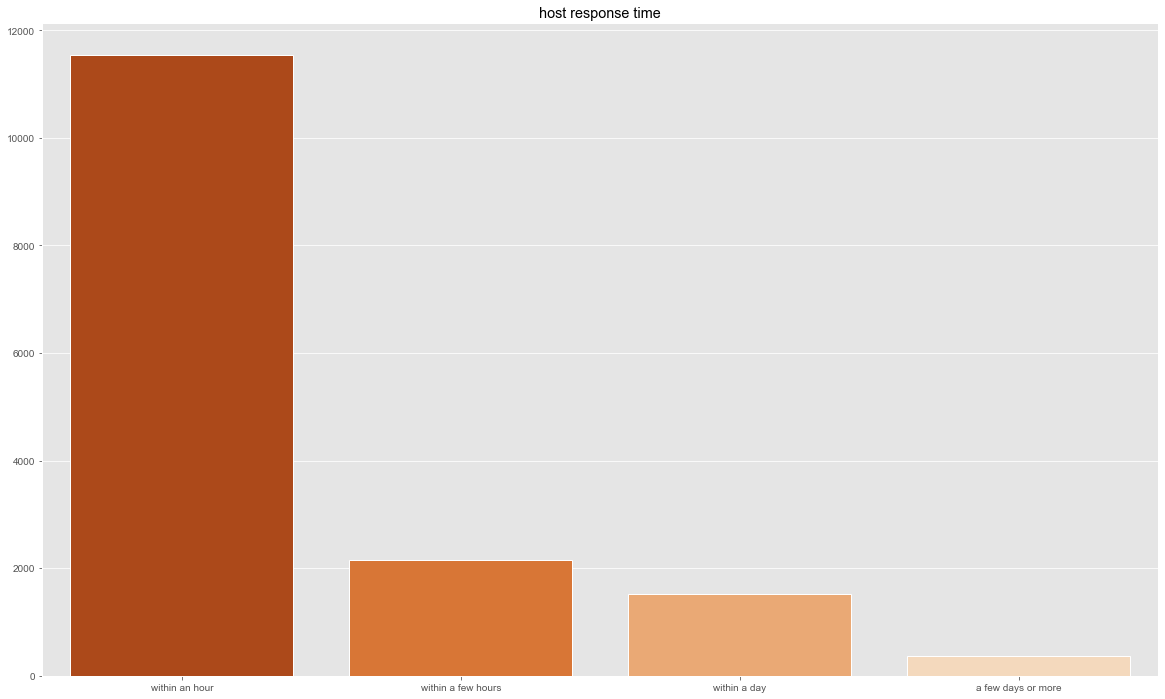

In [17]:
plt.figure(figsize = (20,12))
plt.style.use("ggplot")
plt.title("host response time")
sns.set(font_scale = 2)
sns.countplot(x = df_clean_list["host_response_time"],
              order = ["within an hour", "within a few hours", "within a day", "a few days or more"],
              palette = "Oranges_r")
plt.xlabel("")
plt.ylabel("")

Text(0, 0.5, '')

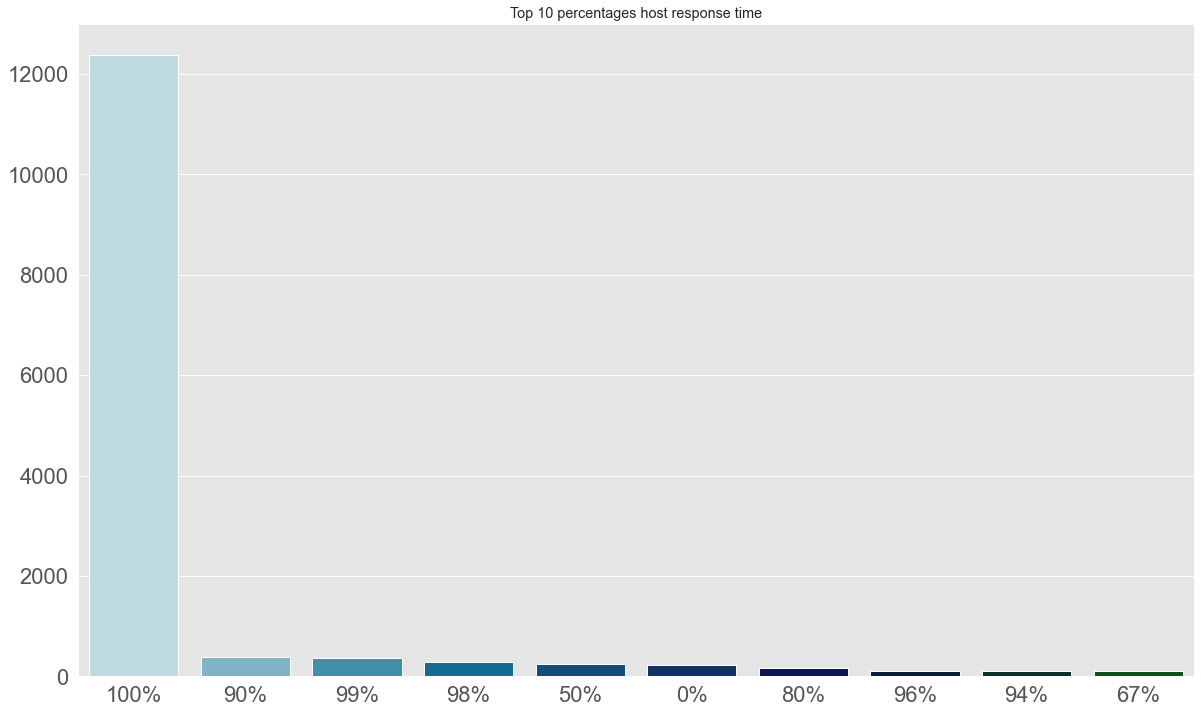

In [18]:
df_clean_list_ord1 = df_clean_list["host_response_rate"].value_counts().sort_values(ascending = False)[:10].index
plt.figure(figsize = (20,12))
plt.style.use("ggplot")
plt.title("Top 10 percentages host response time")
sns.set(font_scale = 2)
sns.countplot(x = df_clean_list.host_response_rate,
              palette = "ocean_r", order = df_clean_list_ord1)
plt.xlabel("")
plt.ylabel("")

In [19]:
df_clean_list["host_verifications"].value_counts()

['email', 'phone', 'reviews', 'jumio', 'government_id']                                                          2765
['email', 'phone', 'reviews']                                                                                    2425
['email', 'phone']                                                                                               2238
['email', 'phone', 'reviews', 'jumio', 'offline_government_id', 'government_id']                                 1463
['email', 'phone', 'reviews', 'jumio', 'offline_government_id', 'selfie', 'government_id', 'identity_manual']    1438
                                                                                                                 ... 
['offline_government_id', 'selfie', 'government_id']                                                                1
['email', 'phone', 'facebook', 'jumio', 'selfie', 'government_id', 'identity_manual']                               1
['email', 'phone', 'google', 'jumio', 'government_id', '

Text(0, 0.5, '')

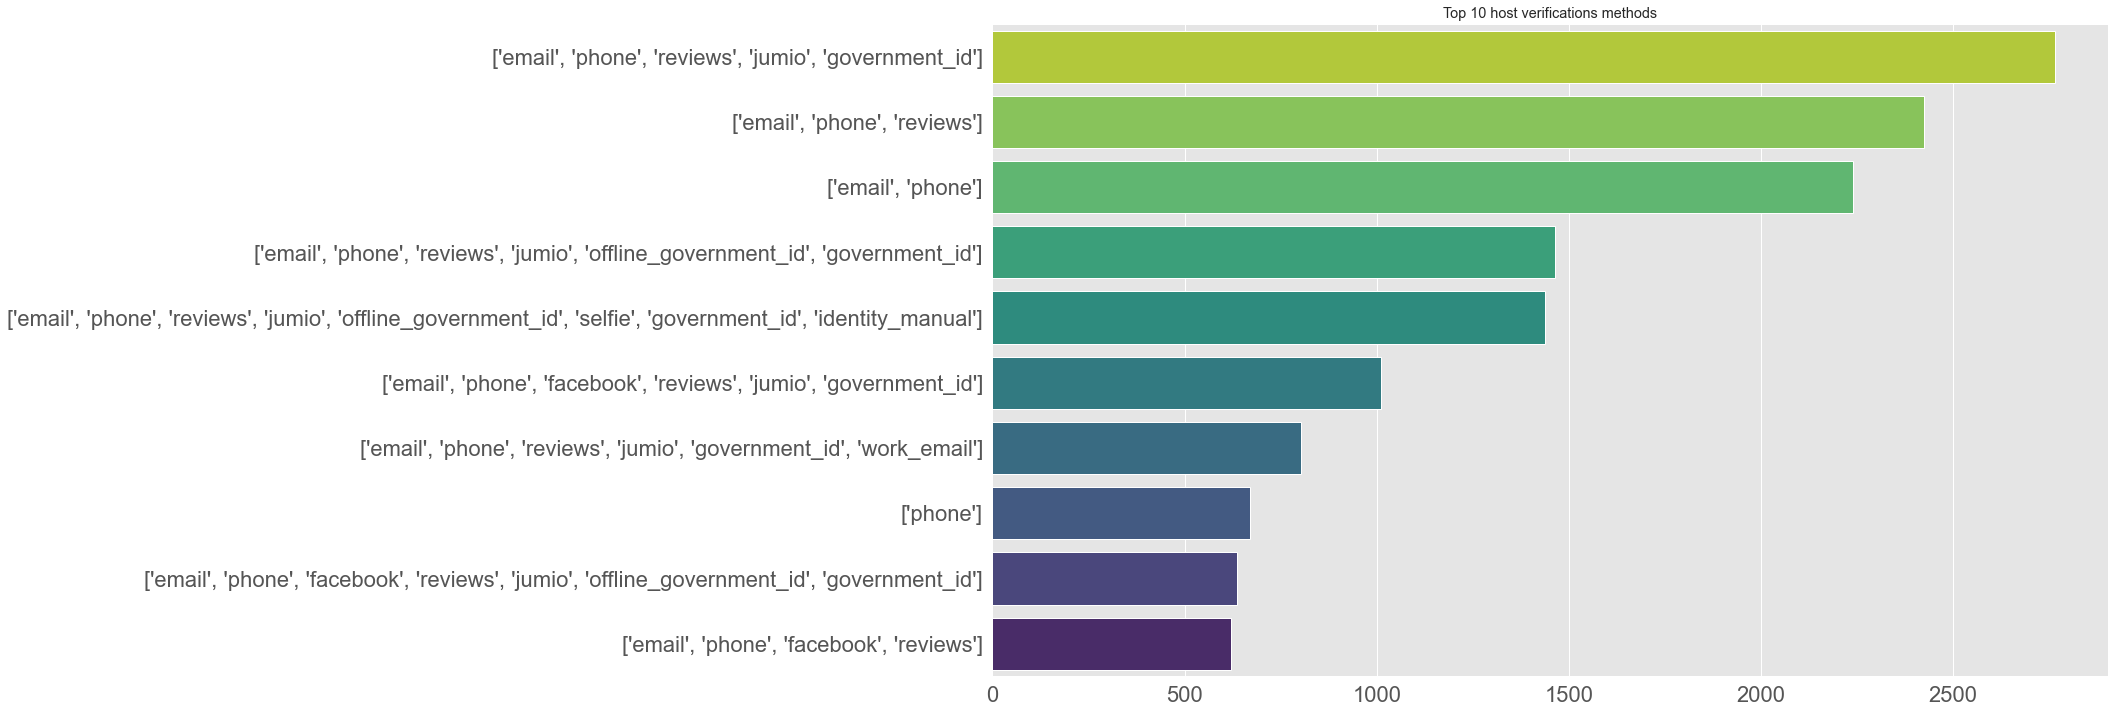

In [20]:
df_clean_list_ord2 = df_clean_list["host_verifications"].value_counts().sort_values(ascending = False)[:10].index
plt.figure(figsize = (20,12))
plt.style.use("ggplot")
plt.title("Top 10 host verifications methods")
sns.set(font_scale = 2)
sns.countplot(y = df_clean_list["host_verifications"], palette = "viridis_r", order = df_clean_list_ord2)
plt.xlabel("")
plt.ylabel("")

Text(0, 0.5, '')

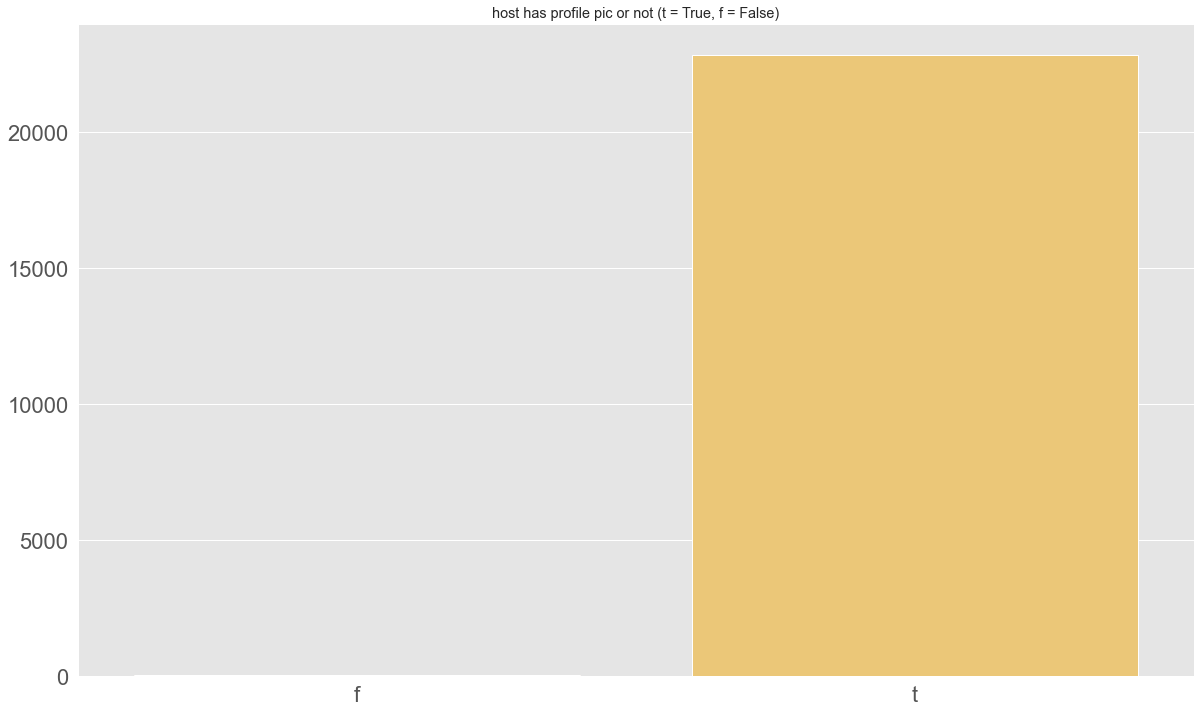

In [21]:
plt.figure(figsize = (20,12))
plt.style.use("ggplot")
plt.title("host has profile pic or not (t = True, f = False)")
sns.set(font_scale = 2)
sns.countplot(x = df_clean_list["host_has_profile_pic"], palette = "YlOrBr_r")
plt.xlabel("")
plt.ylabel("")

Text(0, 0.5, '')

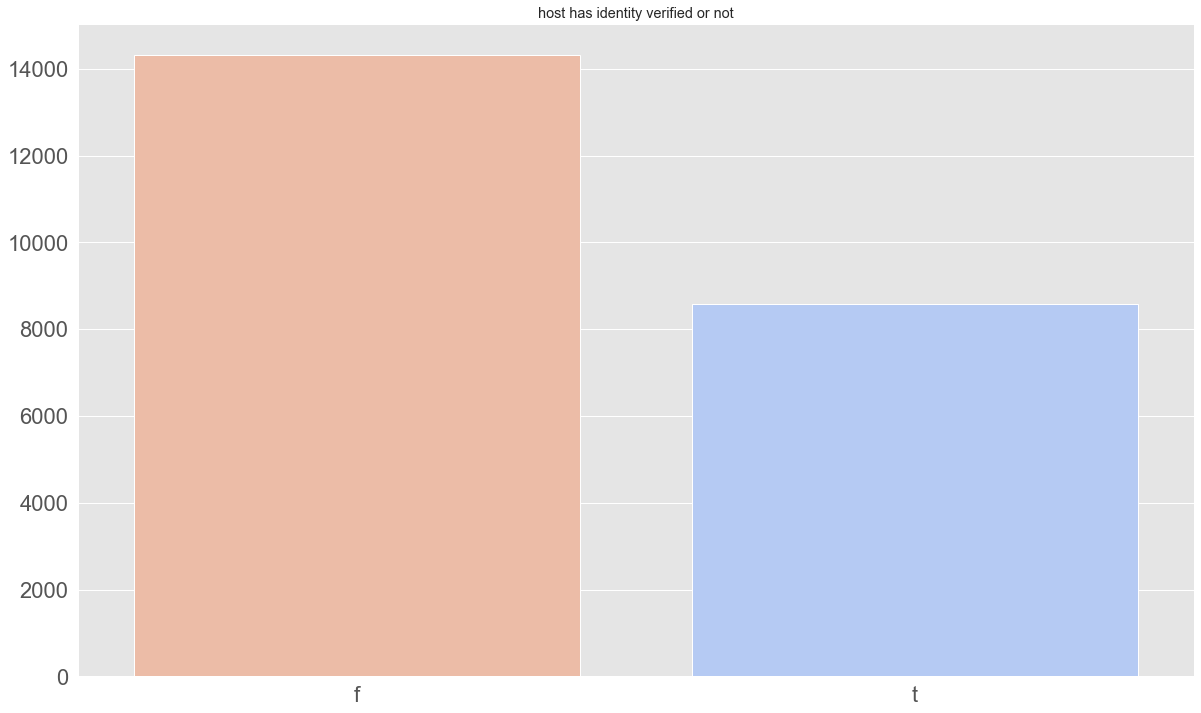

In [22]:
plt.figure(figsize = (20,12))
plt.style.use("ggplot")
plt.title("host has identity verified or not")
sns.set(font_scale = 2)
sns.countplot(x = df_clean_list["host_identity_verified"], palette = "coolwarm_r")
plt.xlabel("")
plt.ylabel("")

Text(0, 0.5, '')

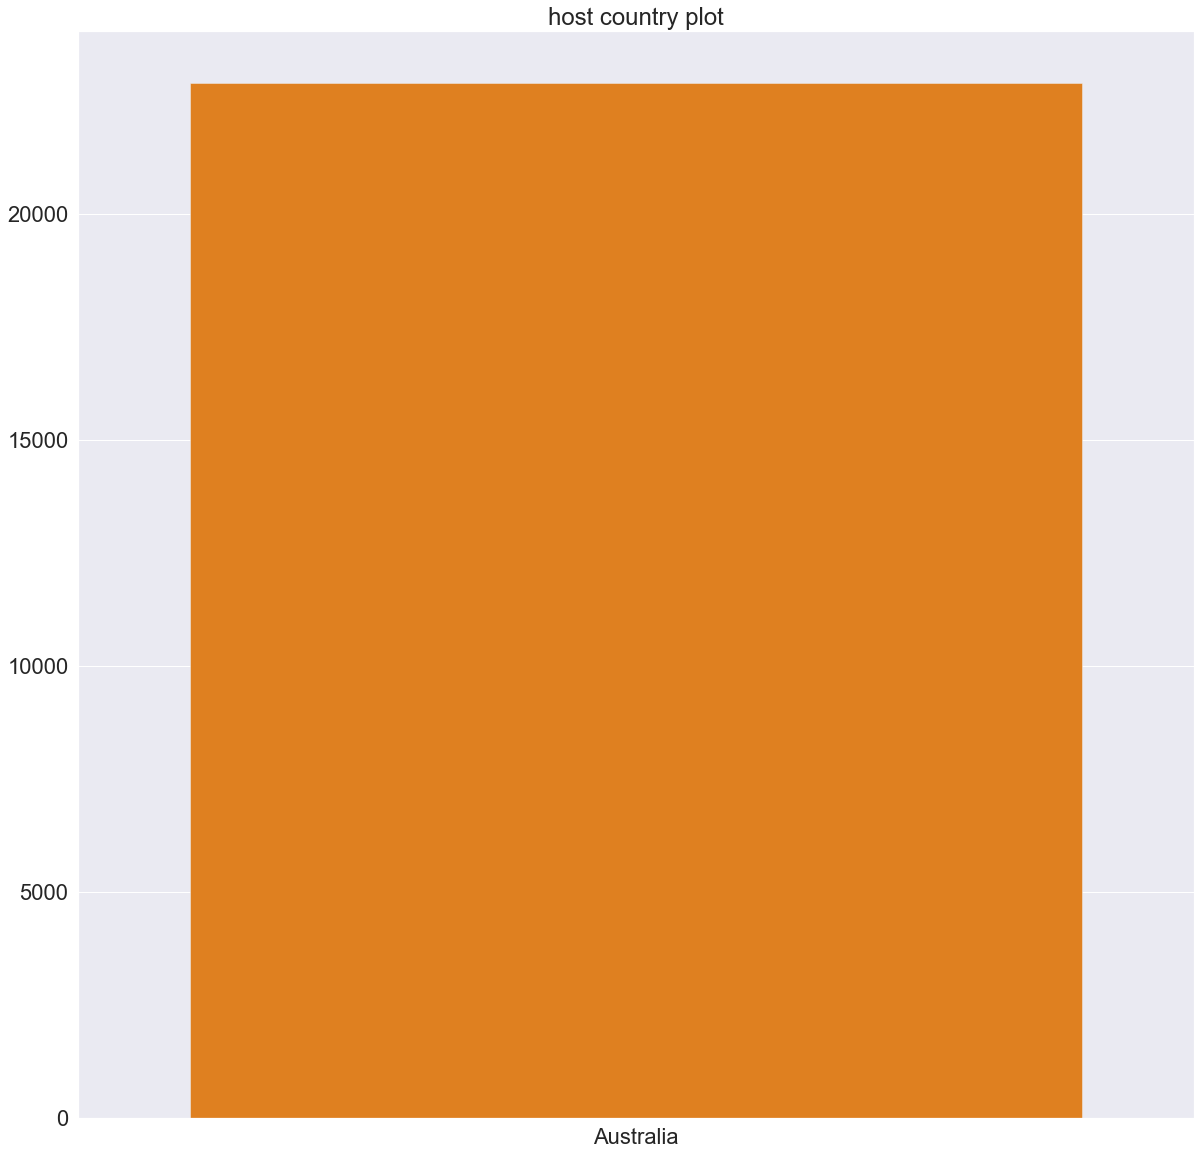

In [23]:
plt.figure(figsize = (20,20))
plt.title("host country plot")
sns.set(font_scale = 2)
plt.style.use("ggplot")
sns.countplot(x = df_clean_list["country"], palette = "autumn")
plt.xlabel("")
plt.ylabel("")

Text(0, 0.5, '')

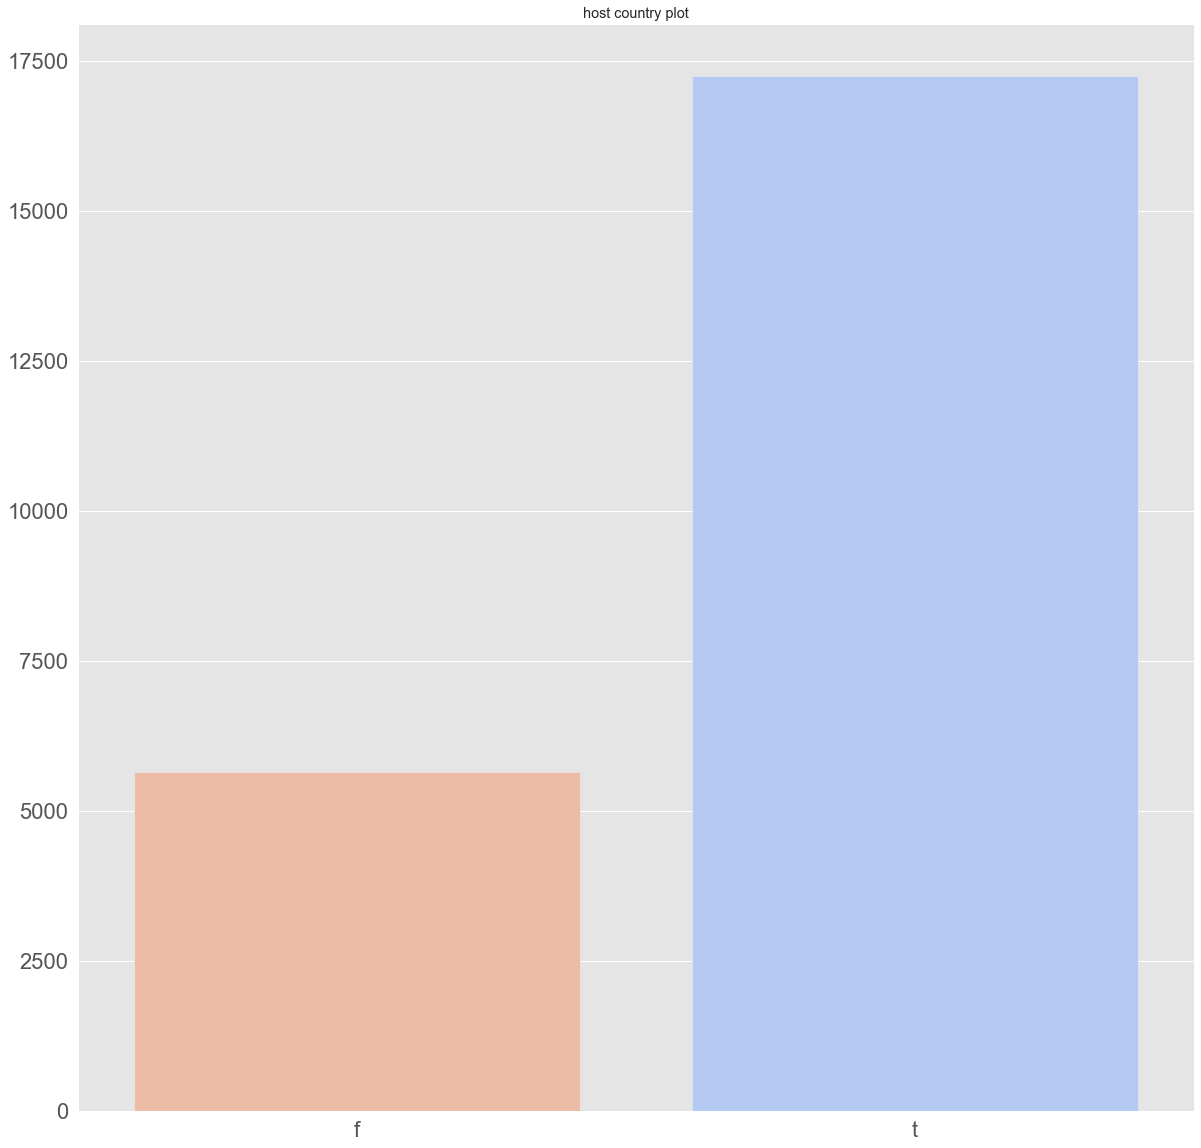

In [24]:
plt.figure(figsize = (20,20))
plt.title("host country plot")
sns.set(font_scale = 2)
plt.style.use("ggplot")
sns.countplot(x = df_clean_list["is_location_exact"], palette = "coolwarm_r")
plt.xlabel("")
plt.ylabel("")

Text(0, 0.5, '')

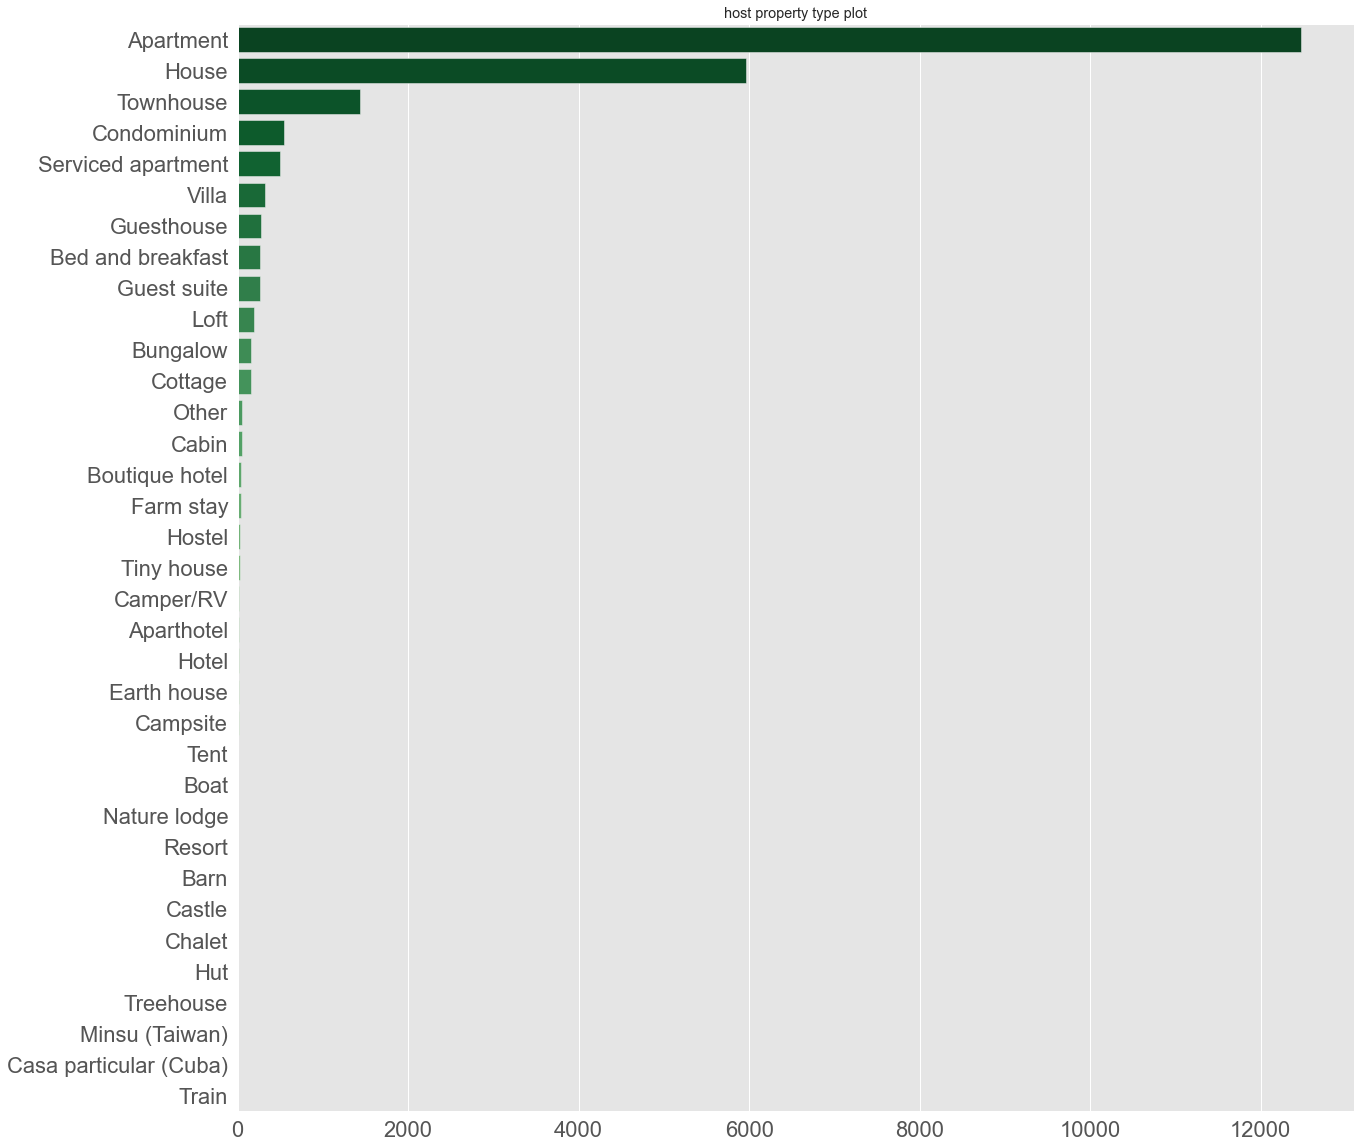

In [25]:
df_clean_list_ord2 = df_clean_list["property_type"].value_counts().sort_values(ascending = False).index
plt.figure(figsize = (20,20))
plt.title("host property type plot")
sns.set(font_scale = 2)
plt.style.use("ggplot")
sns.countplot(y = df_clean_list["property_type"], palette = "Greens_r", order = df_clean_list_ord2)
plt.xlabel("")
plt.ylabel("")

Text(0, 0.5, '')

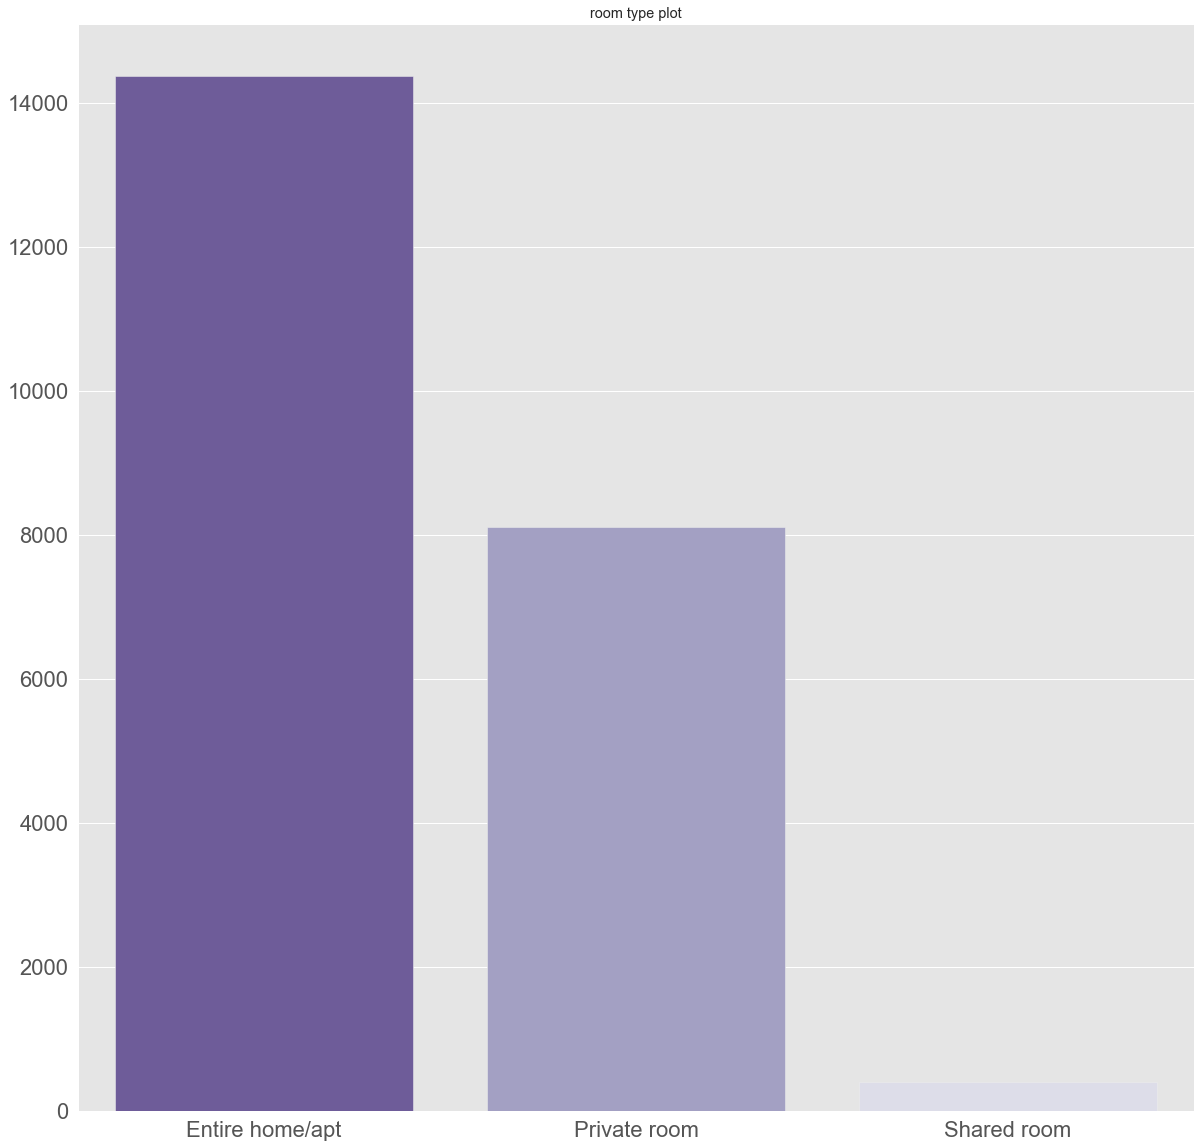

In [26]:
df_clean_list_ord3 = df_clean_list["room_type"].value_counts().sort_values(ascending = False).index
plt.figure(figsize = (20,20))
plt.title("room type plot")
sns.set(font_scale = 2)
plt.style.use("ggplot")
sns.countplot(x = df_clean_list["room_type"], palette = "Purples_r", order = df_clean_list_ord3)
plt.xlabel("")
plt.ylabel("")

Text(0, 0.5, '')

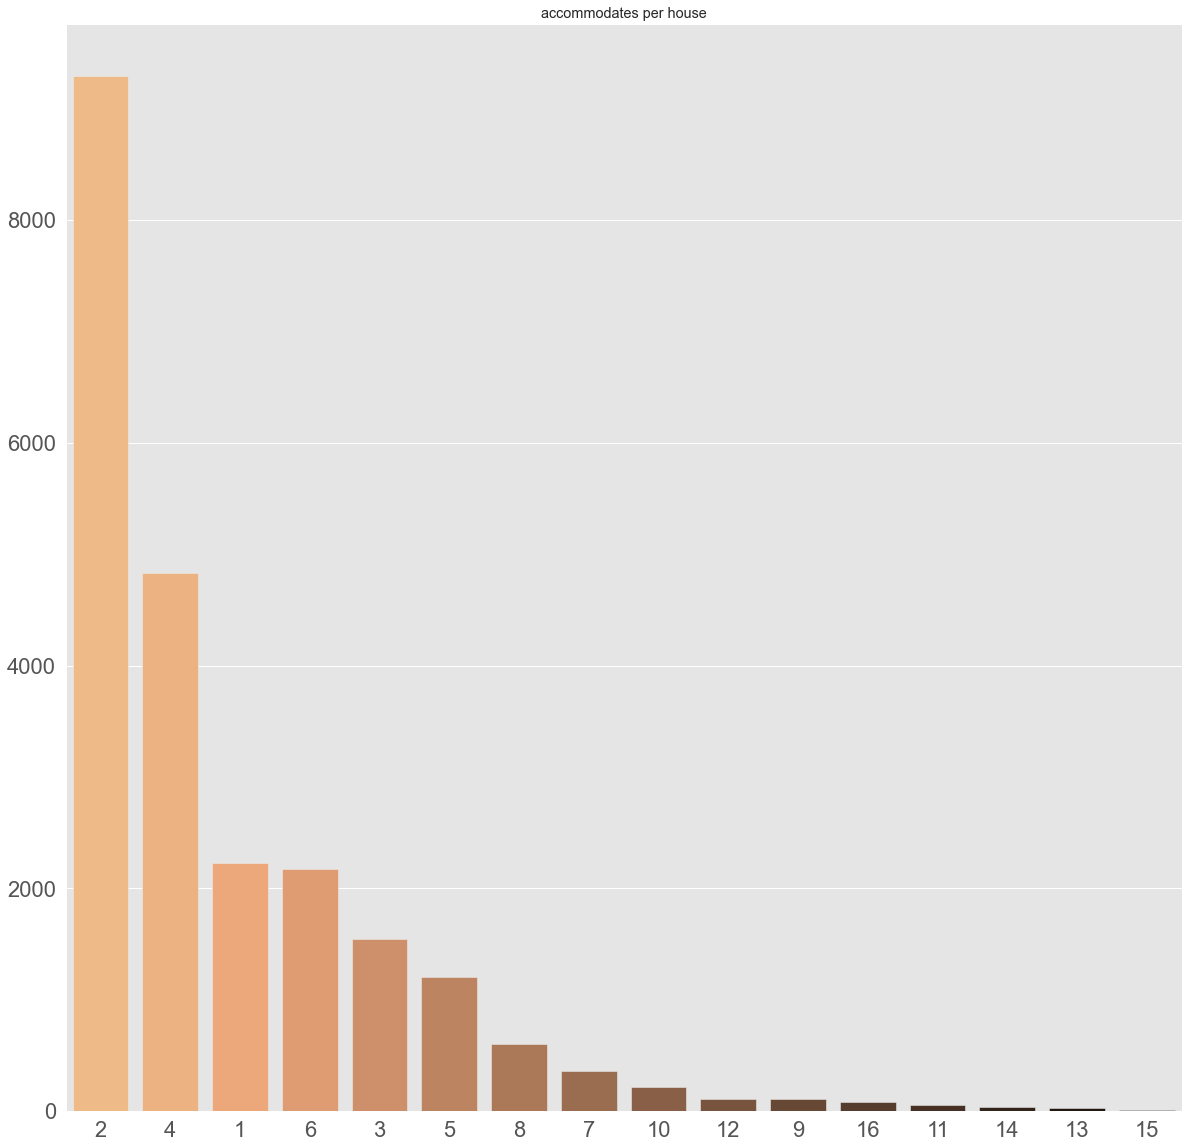

In [27]:
df_clean_list_ord4 = df_clean_list["accommodates"].value_counts().sort_values(ascending = False).index
plt.figure(figsize = (20,20))
plt.title("accommodates per house")
sns.set(font_scale = 2)
plt.style.use("ggplot")
sns.countplot(x = df_clean_list["accommodates"], palette = "copper_r", order = df_clean_list_ord4)
plt.xlabel("")
plt.ylabel("")

Text(0, 0.5, '')

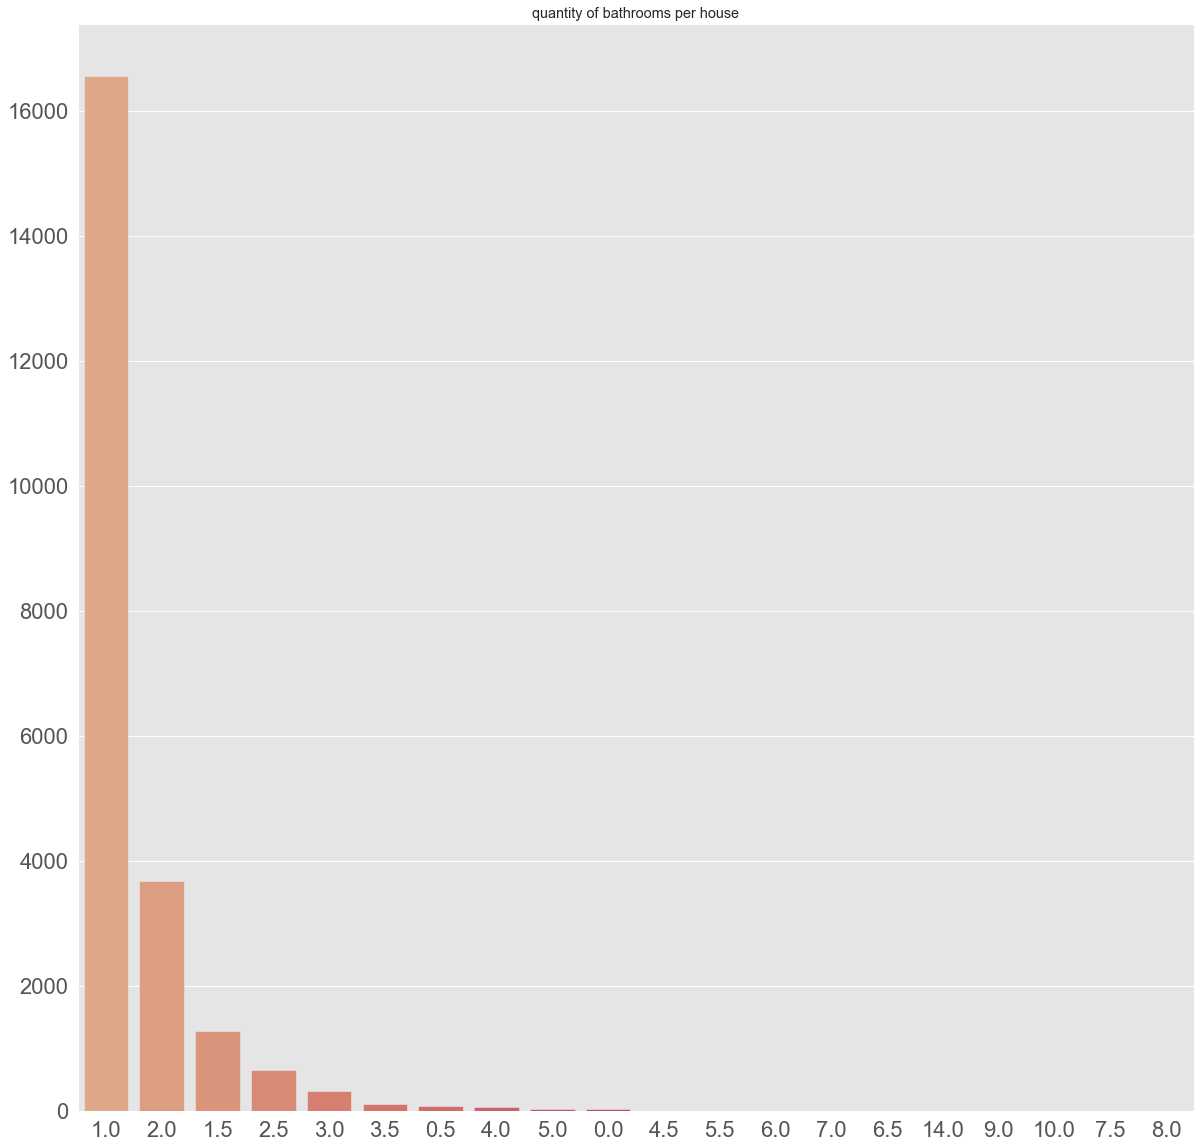

In [28]:
df_clean_list_ord5 = df_clean_list["bathrooms"].value_counts().sort_values(ascending = False).index
plt.figure(figsize = (20,20))
plt.title("quantity of bathrooms per house")
sns.set(font_scale = 2)
plt.style.use("ggplot")
sns.countplot(x = df_clean_list["bathrooms"], palette = "flare", order = df_clean_list_ord5)
plt.xlabel("")
plt.ylabel("")

Text(0, 0.5, '')

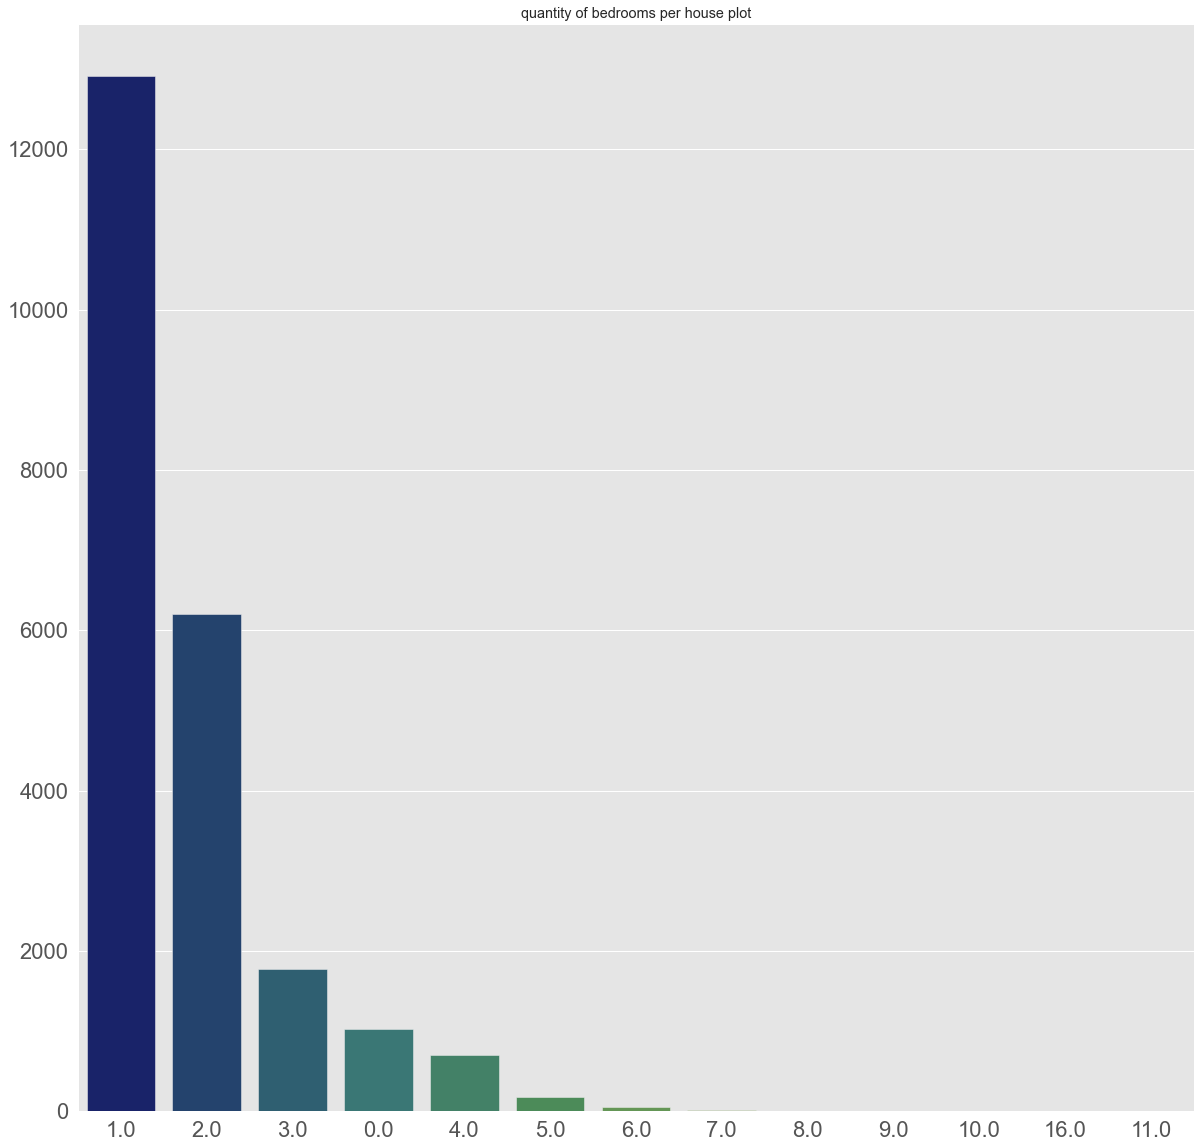

In [29]:
df_clean_list_ord6 = df_clean_list["bedrooms"].value_counts().sort_values(ascending = False).index
plt.figure(figsize = (20,20))
plt.title("quantity of bedrooms per house plot")
sns.set(font_scale = 2)
plt.style.use("ggplot")
sns.countplot(x = df_clean_list["bedrooms"], palette = "gist_earth", order = df_clean_list_ord6)
plt.xlabel("")
plt.ylabel("")

Text(0, 0.5, '')

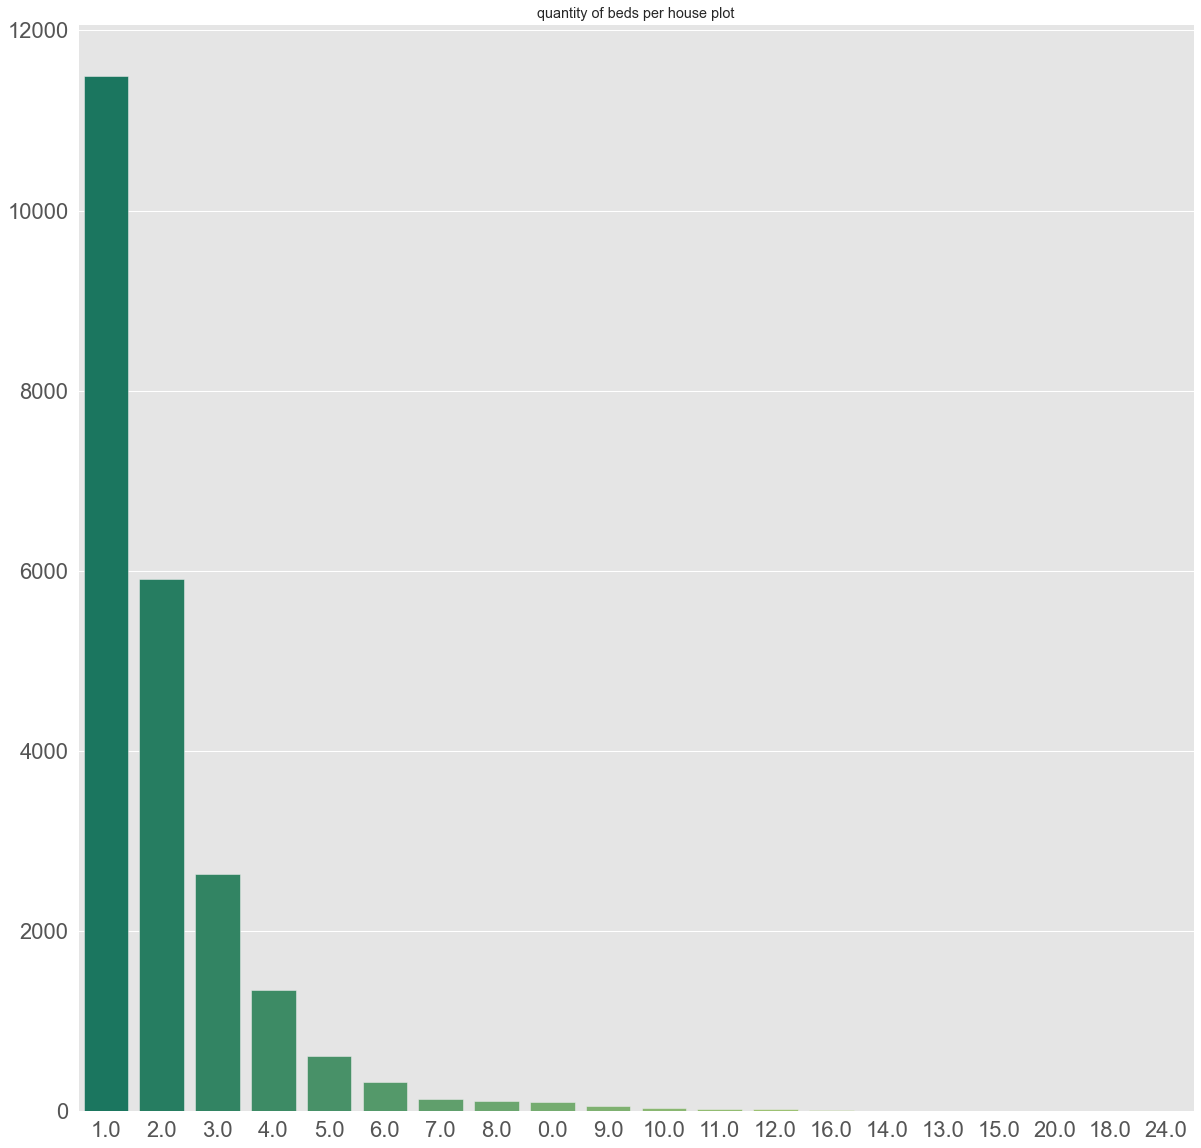

In [30]:
df_clean_list_ord7 = df_clean_list["beds"].value_counts().sort_values(ascending = False).index
plt.figure(figsize = (20,20))
plt.title("quantity of beds per house plot")
sns.set(font_scale = 2)
plt.style.use("ggplot")
sns.countplot(x = df_clean_list["beds"], palette = "summer", order = df_clean_list_ord7)
plt.xlabel("")
plt.ylabel("")

Text(0, 0.5, '')

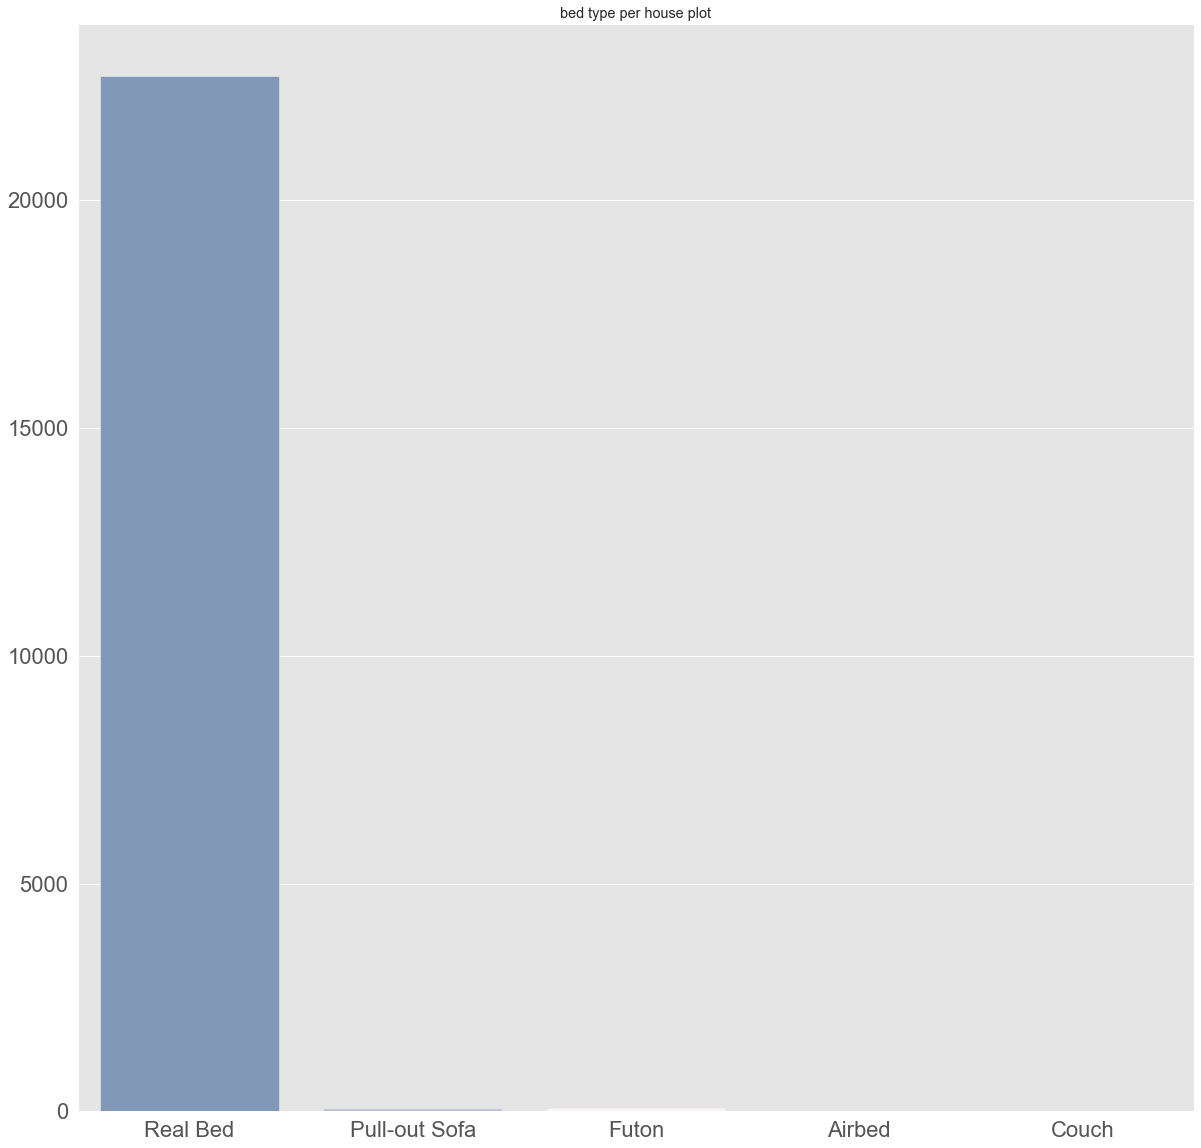

In [31]:
df_clean_list_ord8 = df_clean_list["bed_type"].value_counts().sort_values(ascending = False).index
plt.figure(figsize = (20,20))
plt.title("bed type per house plot")
sns.set(font_scale = 2)
plt.style.use("ggplot")
sns.countplot(x = df_clean_list["bed_type"], palette = "vlag", order = df_clean_list_ord8)
plt.xlabel("")
plt.ylabel("")

Text(0, 0.5, '')

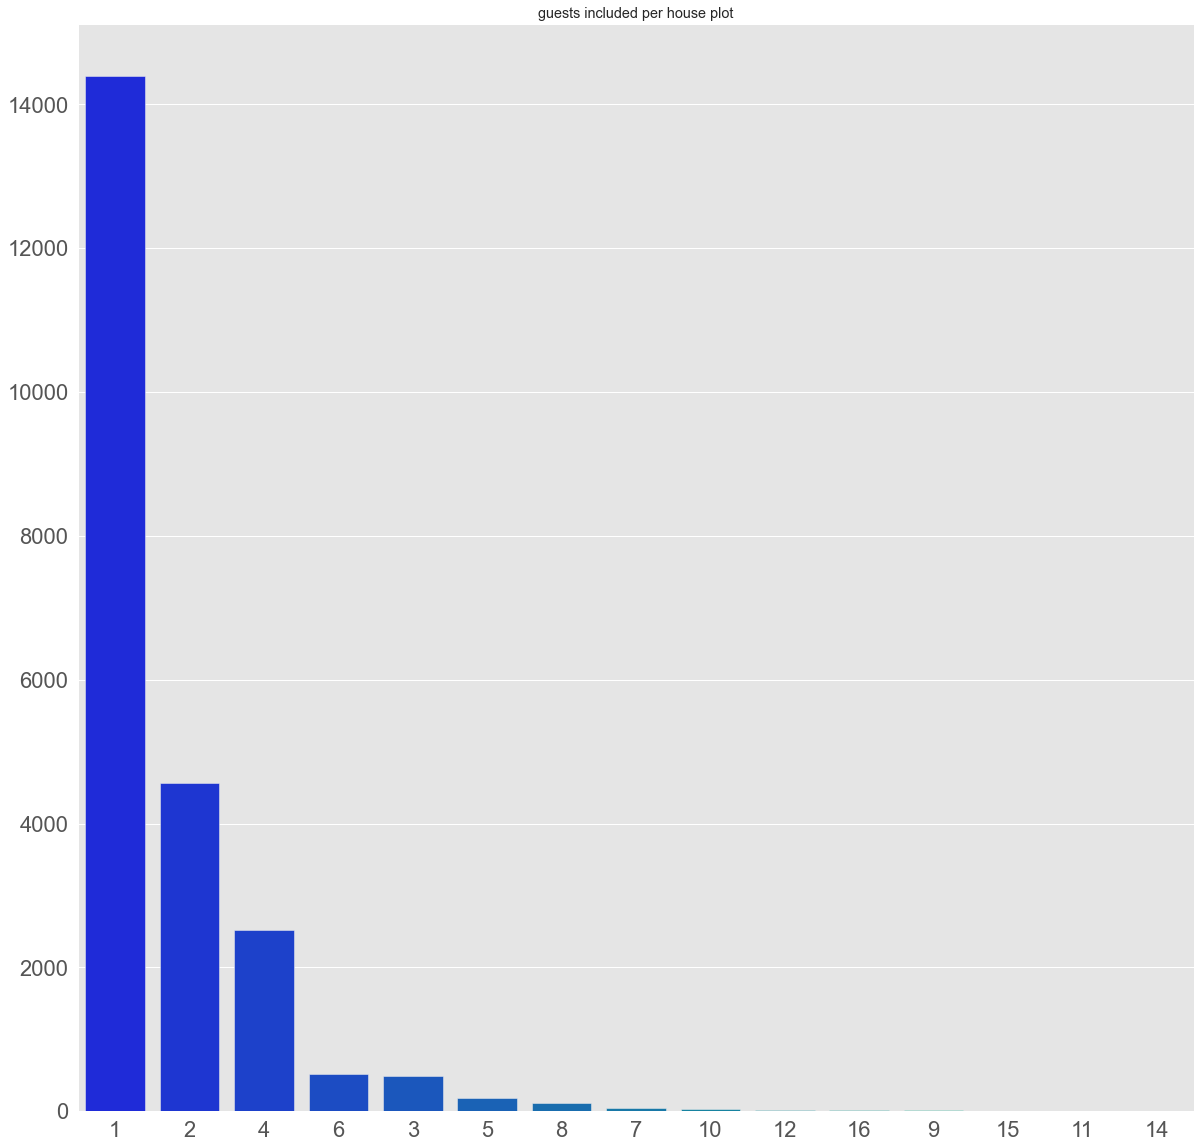

In [32]:
df_clean_list_ord9 = df_clean_list["guests_included"].value_counts().sort_values(ascending = False).index
plt.figure(figsize = (20,20))
plt.title("guests included per house plot")
sns.set(font_scale = 2)
plt.style.use("ggplot")
sns.countplot(x = df_clean_list["guests_included"], palette = "winter", order = df_clean_list_ord9)
plt.xlabel("")
plt.ylabel("")

Text(0, 0.5, '')

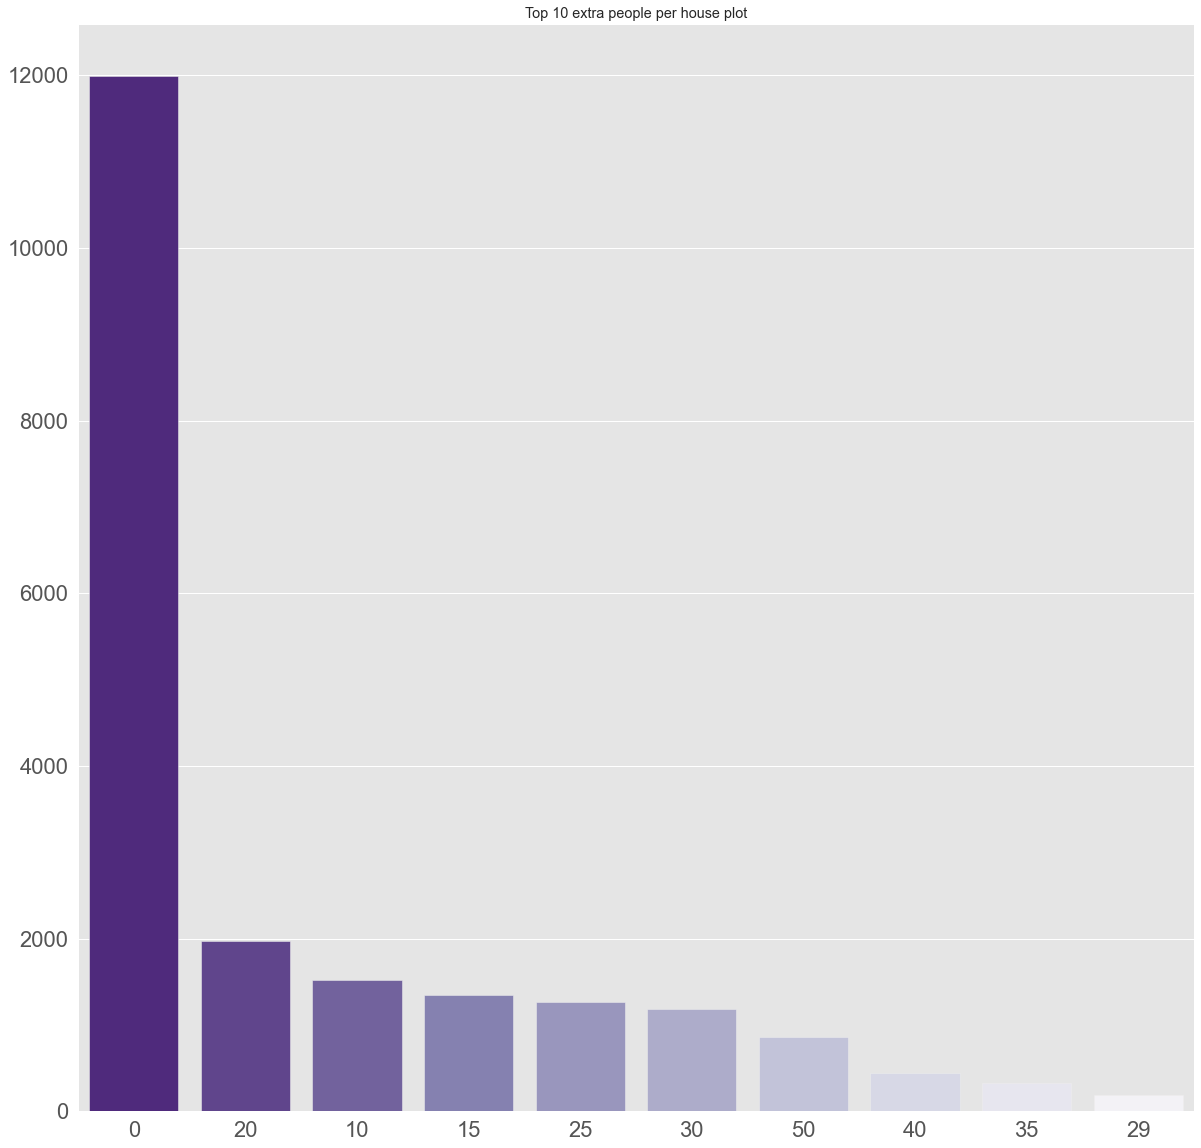

In [33]:
df_clean_list_ord10 = df_clean_list["extra_people"].value_counts().sort_values(ascending = False)[:10].index
plt.figure(figsize = (20,20))
plt.title("Top 10 extra people per house plot")
sns.set(font_scale = 2)
plt.style.use("ggplot")
sns.countplot(x = df_clean_list["extra_people"], palette = "Purples_r", order = df_clean_list_ord10)
plt.xlabel("")
plt.ylabel("")

Text(0, 0.5, '')

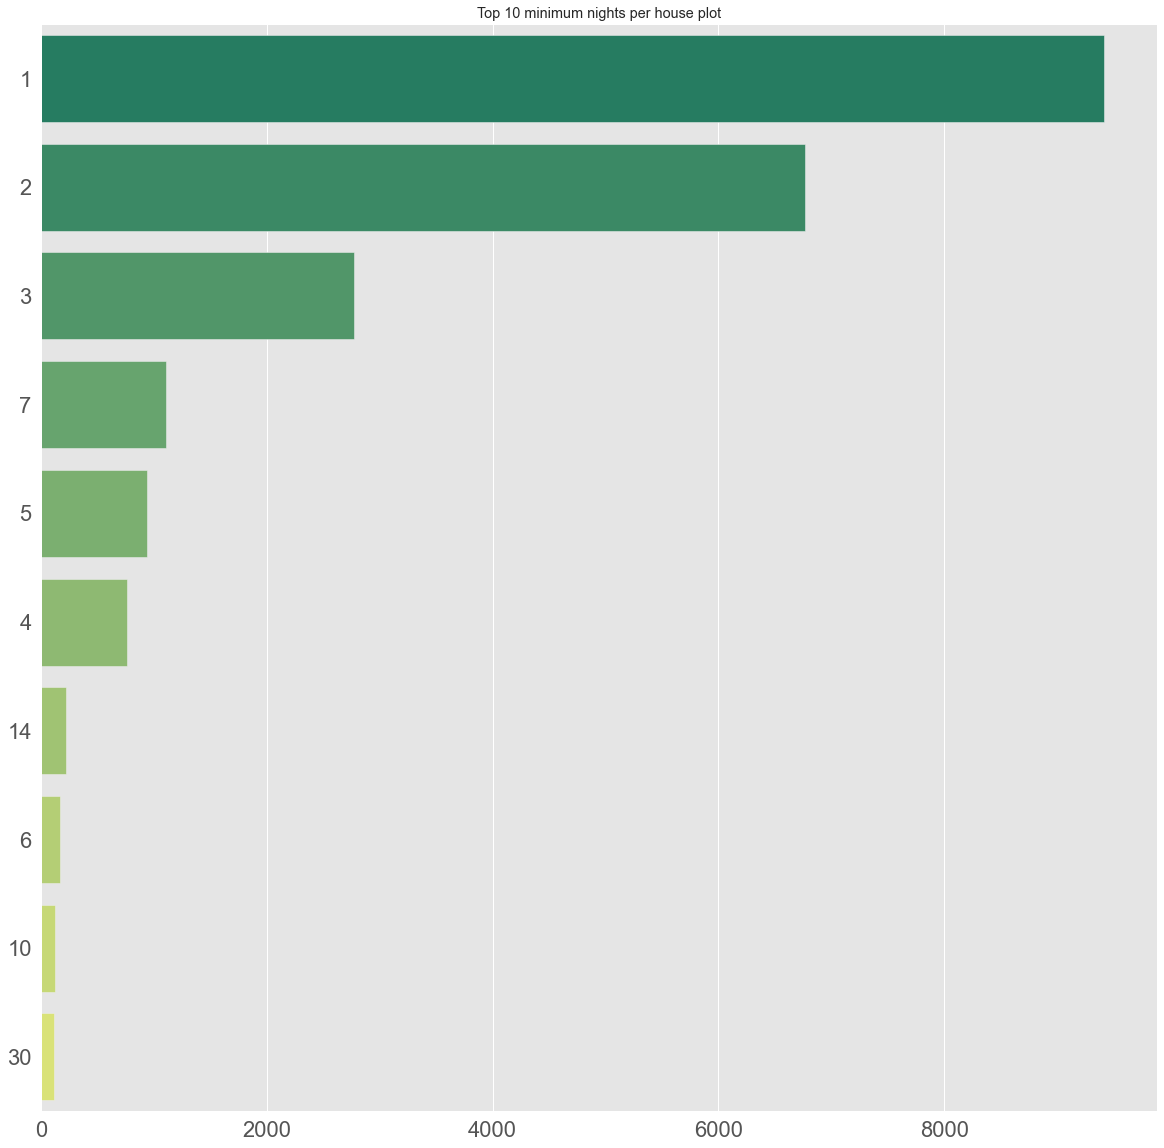

In [34]:
df_clean_list_ord11 = df_clean_list["minimum_nights"].value_counts().sort_values(ascending = False)[:10].index
plt.figure(figsize = (20,20))
plt.title("Top 10 minimum nights per house plot")
sns.set(font_scale = 2)
plt.style.use("ggplot")
sns.countplot(y = df_clean_list["minimum_nights"], palette = "summer", order = df_clean_list_ord11)
plt.xlabel("")
plt.ylabel("")

Text(0, 0.5, '')

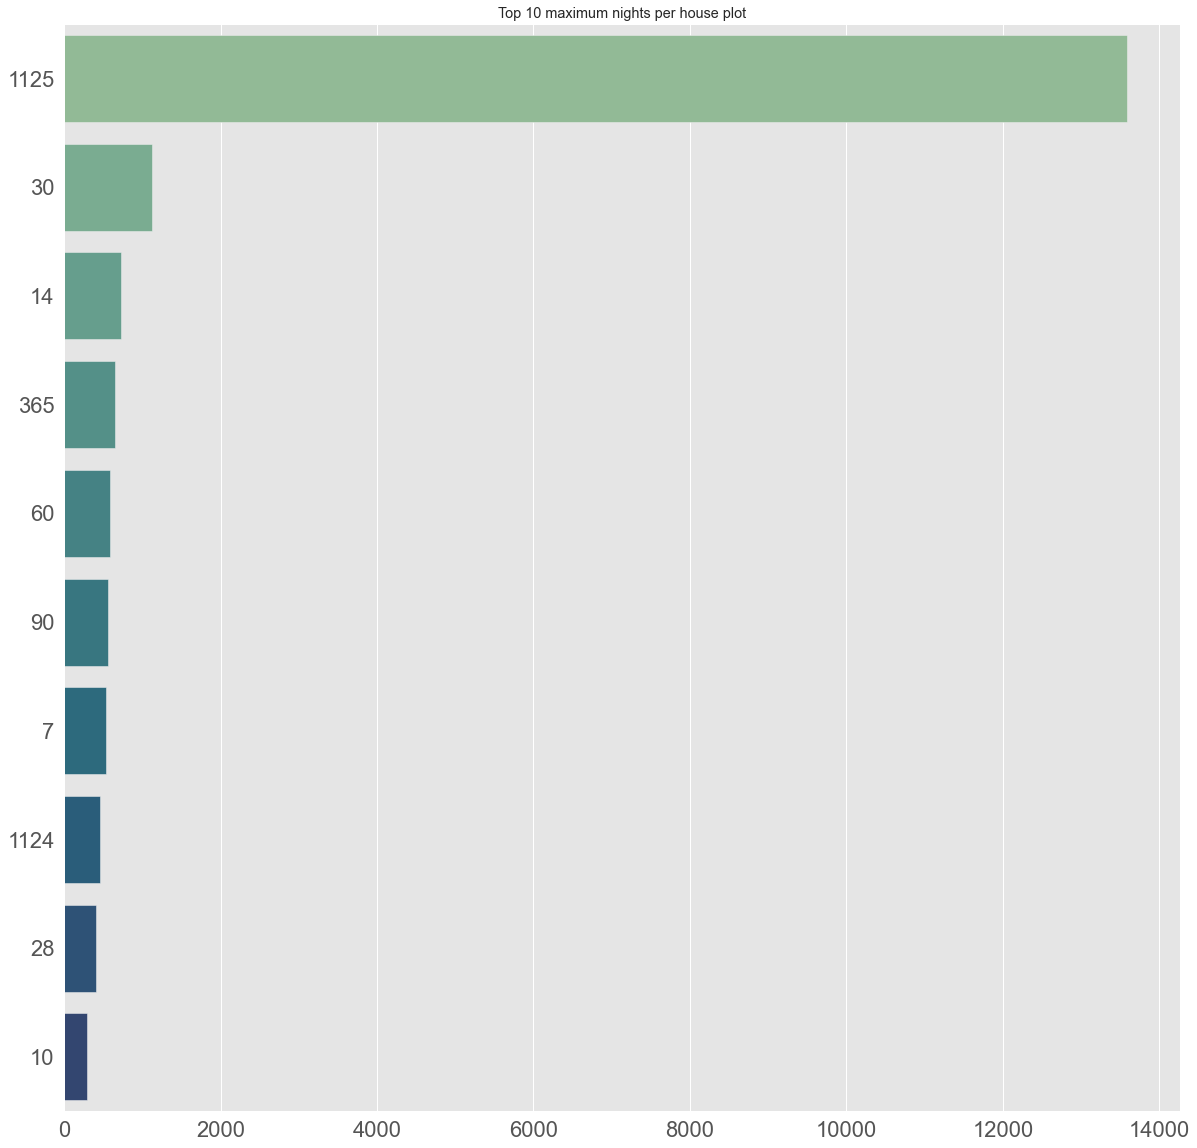

In [35]:
df_clean_list_ord11 = df_clean_list["maximum_nights"].value_counts().sort_values(ascending = False)[:10].index
plt.figure(figsize = (20,20))
plt.title("Top 10 maximum nights per house plot")
sns.set(font_scale = 2)
plt.style.use("ggplot")
sns.countplot(y = df_clean_list["maximum_nights"], palette = "crest", order = df_clean_list_ord11)
plt.xlabel("")
plt.ylabel("")

Text(0, 0.5, '')

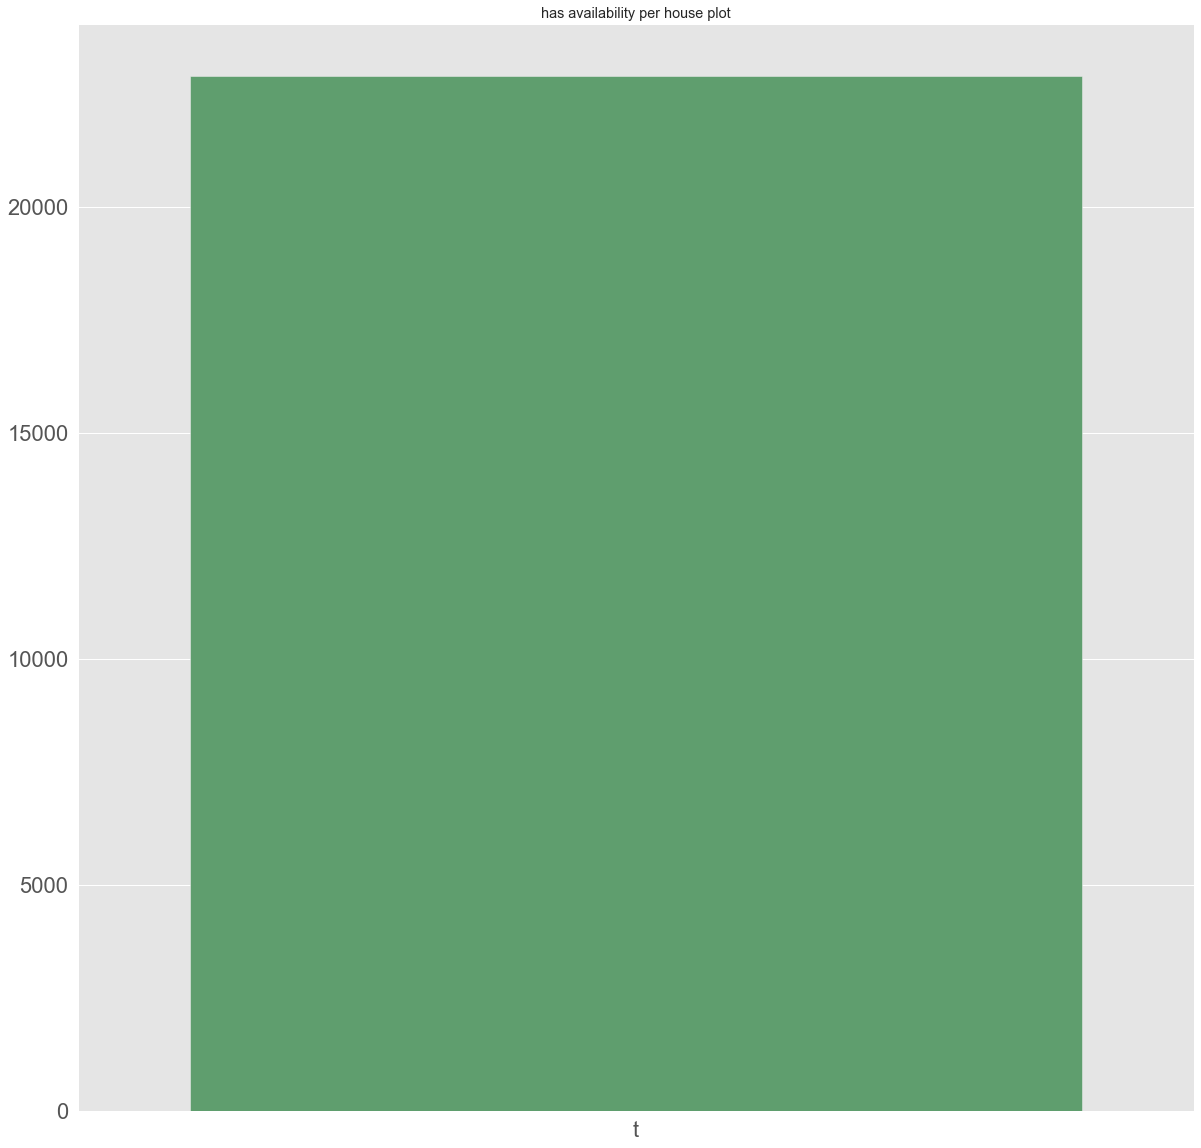

In [36]:
plt.figure(figsize = (20,20))
plt.title("has availability per house plot")
sns.set(font_scale = 2)
plt.style.use("ggplot")
sns.countplot(x = df_clean_list["has_availability"], color = "g")
plt.xlabel("")
plt.ylabel("")

Text(0, 0.5, '')

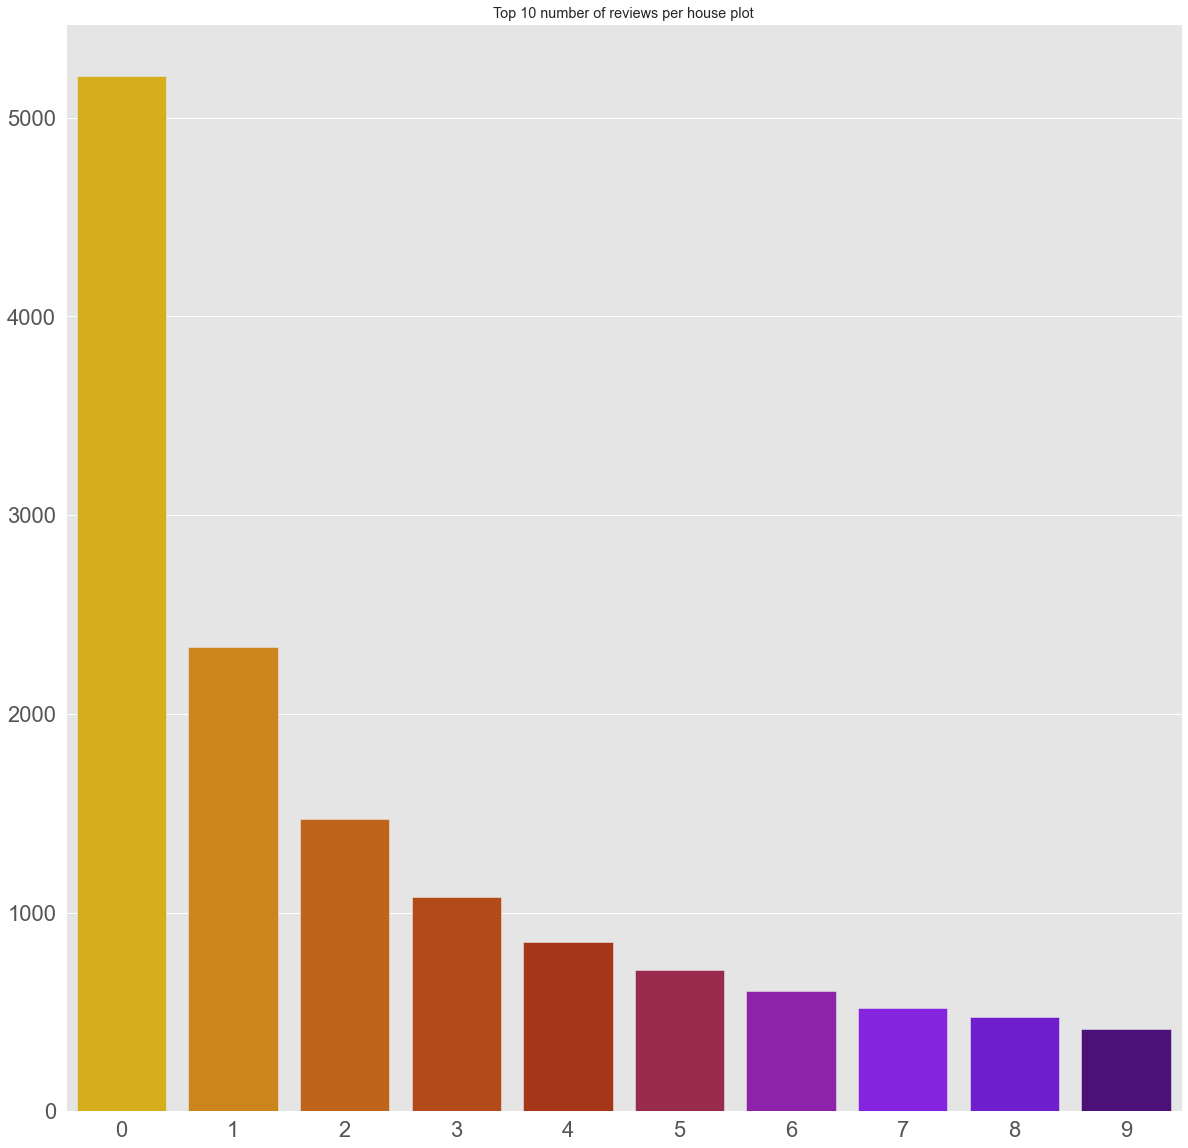

In [37]:
df_clean_list_ord12 = df_clean_list["number_of_reviews"].value_counts().sort_values(ascending = False)[:10].index
plt.figure(figsize = (20,20))
plt.title("Top 10 number of reviews per house plot")
sns.set(font_scale = 2)
plt.style.use("ggplot")
sns.countplot(x = df_clean_list["number_of_reviews"], palette = "gnuplot_r", order = df_clean_list_ord12)
plt.xlabel("")
plt.ylabel("")

Text(0, 0.5, '')

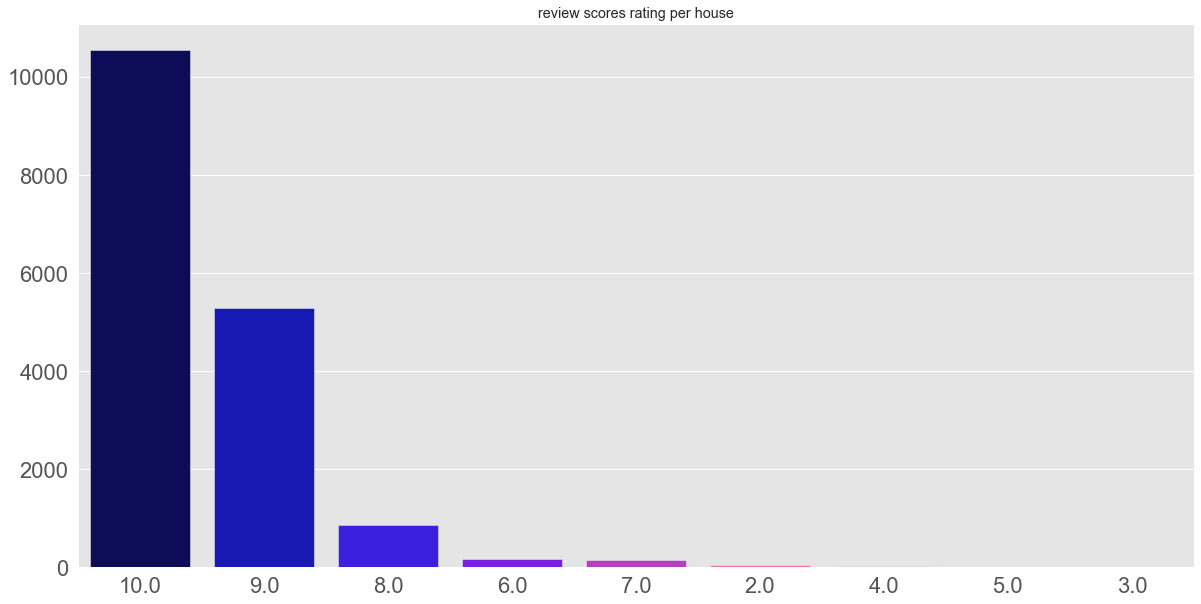

In [38]:
df_clean_list_ord13 = df_clean_list["review_scores_value"].value_counts().sort_values(ascending = False).index
plt.figure(figsize = (20,10))
plt.title("review scores rating per house")
sns.set(font_scale = 2)
plt.style.use("ggplot")
sns.countplot(x = df_clean_list["review_scores_value"], palette = "gnuplot2", order = df_clean_list_ord13)
plt.xlabel("")
plt.ylabel("")

Text(0, 0.5, '')

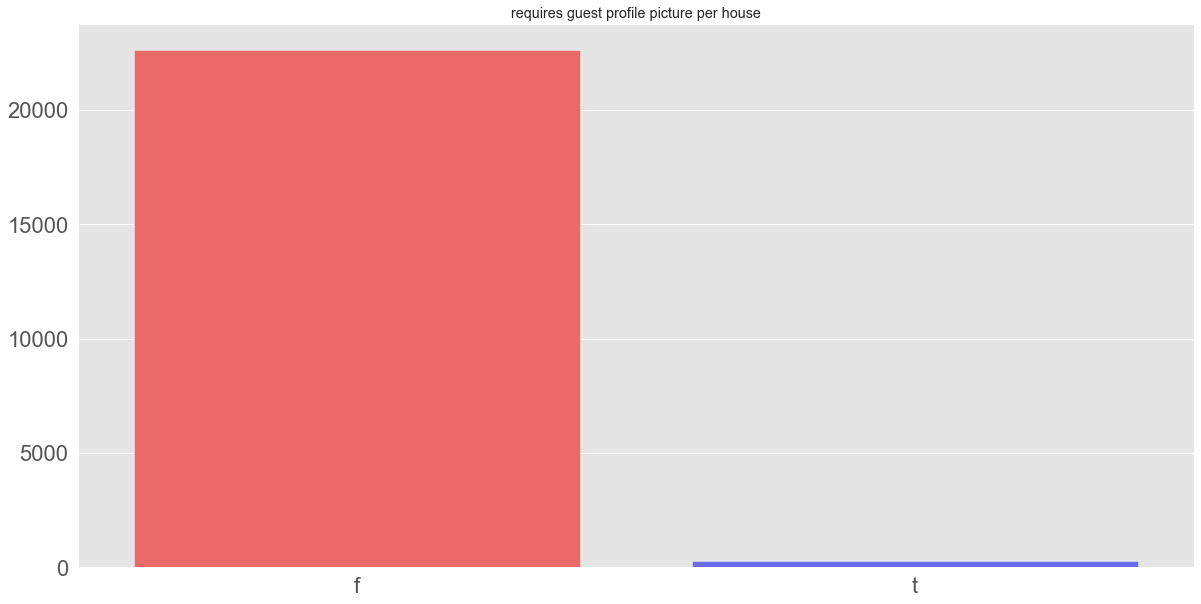

In [39]:
plt.figure(figsize = (20,10))
plt.title("requires guest profile picture per house")
sns.set(font_scale = 2)
plt.style.use("ggplot")
sns.countplot(x = df_clean_list["require_guest_profile_picture"], palette = "seismic_r")
plt.xlabel("")
plt.ylabel("")

Text(0, 0.5, '')

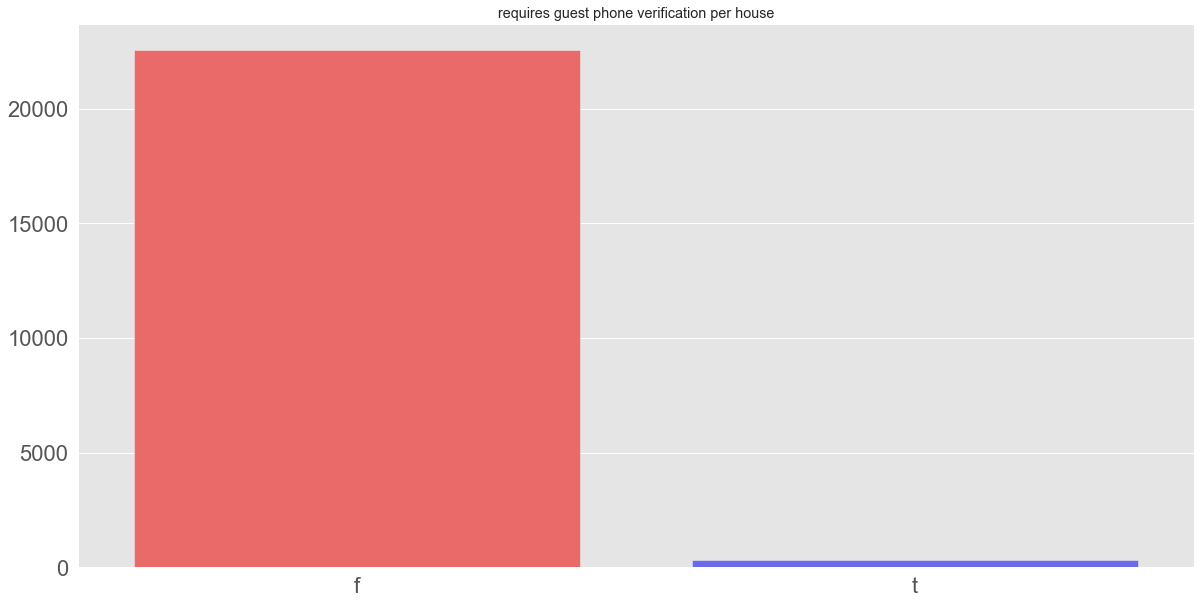

In [40]:
plt.figure(figsize = (20,10))
plt.title("requires guest phone verification per house")
sns.set(font_scale = 2)
plt.style.use("ggplot")
sns.countplot(x = df_clean_list["require_guest_phone_verification"], palette = "seismic_r")
plt.xlabel("")
plt.ylabel("")

In [41]:
df_clean_list.head()

,id,name,summary,space,description,neighborhood_overview,notes,transit,access,interaction,house_rules,host_location,host_about,host_response_time,host_response_rate,host_verifications,host_has_profile_pic,host_identity_verified,neighborhood,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,price,weekly_price,monthly_price,guests_included,extra_people,minimum_nights,maximum_nights,has_availability,number_of_reviews,review_scores_rating,review_scores_value,require_guest_profile_picture,require_guest_phone_verification,reviews_per_month
0,9835,Beautiful Room & House,NaN,"House: Clean, New, Modern, Quite, Safe. 10Km f...","House: Clean, New, Modern, Quite, Safe. 10Km f...",Very safe! Family oriented. Older age group.,NaN,"YES ! The bus (305,309) is exactly two blocks ...","Kitchen, backyard, upstairs lounge. We'd like ...",As much as the guest wants.,Prefence would be given females or a couple,AU,About us: We are an East Indian couple in our ...,a few days or more,0%,"['email', 'phone', 'reviews']",f,f,Balwyn North,Australia,-37.772684,145.092133,f,House,Private room,2,1.0,1.0,2.0,Real Bed,"{Internet,Wifi,""Pets live on this property"",Do...",60,NaN,NaN,1,22,1,365,t,4,90.0,9.0,f,f,0.04
1,10803,Room in Cool Deco Apartment in Brunswick,A large air conditioned room with queen spring...,The apartment is Deco/Edwardian in style and h...,A large air conditioned room with queen spring...,This hip area is a crossroads between two grea...,NaN,Easy transport options - the tram is right out...,Wifi. Bathroom and kitchen is shared but I mos...,I'm home mostly but sometimes I may be working...,Theres a yoga studio downstairs so if you see ...,"Melbourne, Victoria, Australia",As an artist working in animation and video I ...,NaN,NaN,"['email', 'phone', 'reviews', 'jumio', 'govern...",t,t,Brunswick,Australia,-37.766505,144.980736,t,Apartment,Private room,2,1.0,1.0,1.0,Futon,"{TV,Internet,Wifi,""Air conditioning"",Kitchen,H...",35,200.0,803.0,1,15,3,45,t,108,87.0,9.0,t,t,1.50
2,12936,St Kilda 1BR APT+BEACHSIDE+VIEWS+PARKING+WIFI+AC,RIGHT IN THE HEART OF ST KILDA! It doesn't get...,FREE WiFi FREE in-building remote controlled g...,RIGHT IN THE HEART OF ST KILDA! It doesn't get...,A stay at our apartment means you can enjoy so...,First floor apartment with both lift and stair...,Our apartment is located within walking distan...,Guests have exclusive and private access to th...,We don't always get to meet all our guests in ...,Please take a moment now to read our House Rul...,"Melbourne, Victoria, Australia","Hi, we’re Frank and Vince.\r\n\r\nThanks for r...",within an hour,100%,"['email', 'phone', 'google', 'reviews', 'jumio...",t,t,St Kilda,Australia,-37.859755,144.977369,t,Apartment,Entire home/apt,3,1.0,1.0,2.0,Real Bed,"{TV,Internet,Wifi,""Air conditioning"",Kitchen,""...",159,1253.0,4452.0,2,28,3,28,t,15,94.0,9.0,f,f,0.15
3,15246,Large private room-close to city,"Comfortable, relaxed house, a home away from ...",The atmosphere is relaxed and easy going. You ...,"Comfortable, relaxed house, a home away from ...","This is a great neighbourhood – it is quiet, y...",A simple self service breakfast is available –...,Public transport is super convenient with a ch...,You are welcome to make yourself at home in th...,Guest's privacy will be respected at all times...,"• Respect for our home, for each other, and th...","Melbourne, Victoria, Australia","Artist, academic, community activist, travelle...",NaN,NaN,"['email', 'phone', 'facebook', 'reviews', 'jum...",t,t,Thornbury,Australia,-37.758971,144.989228,t,House,Private room,1,1.5,1.0,1.0,Real Bed,"{TV,Internet,Wifi,Kitchen,""Free parking on pre...",50,250.0,920.0,1,20,2,200,t,29,94.0,9.0,f,f,0.30
4,16760,Melbourne BnB near City & Sports,NaN,We offer comfortable accommodation in Inner Me...,We offer comfortable accommodation in Inner Me...,NaN,NaN,NaN,NaN,NaN,"Are you gay friendly? Yes, we welcome gay, les...","Saint Kilda East

In [42]:
df_clean_list.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22895 entries, 0 to 22894
Data columns (total 45 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                22895 non-null  int64  
 1   name                              22892 non-null  object 
 2   summary                           22199 non-null  object 
 3   space                             16844 non-null  object 
 4   description                       22563 non-null  object 
 5   neighborhood_overview             14424 non-null  object 
 6   notes                             11546 non-null  object 
 7   transit                           14943 non-null  object 
 8   access                            15168 non-null  object 
 9   interaction                       14537 non-null  object 
 10  house_rules                       15032 non-null  object 
 11  host_location                     22869 non-null  object 
 12  host

<AxesSubplot:title={'center':'score rating and beds quantity relation plot'}, xlabel='review_scores_rating', ylabel='beds'>

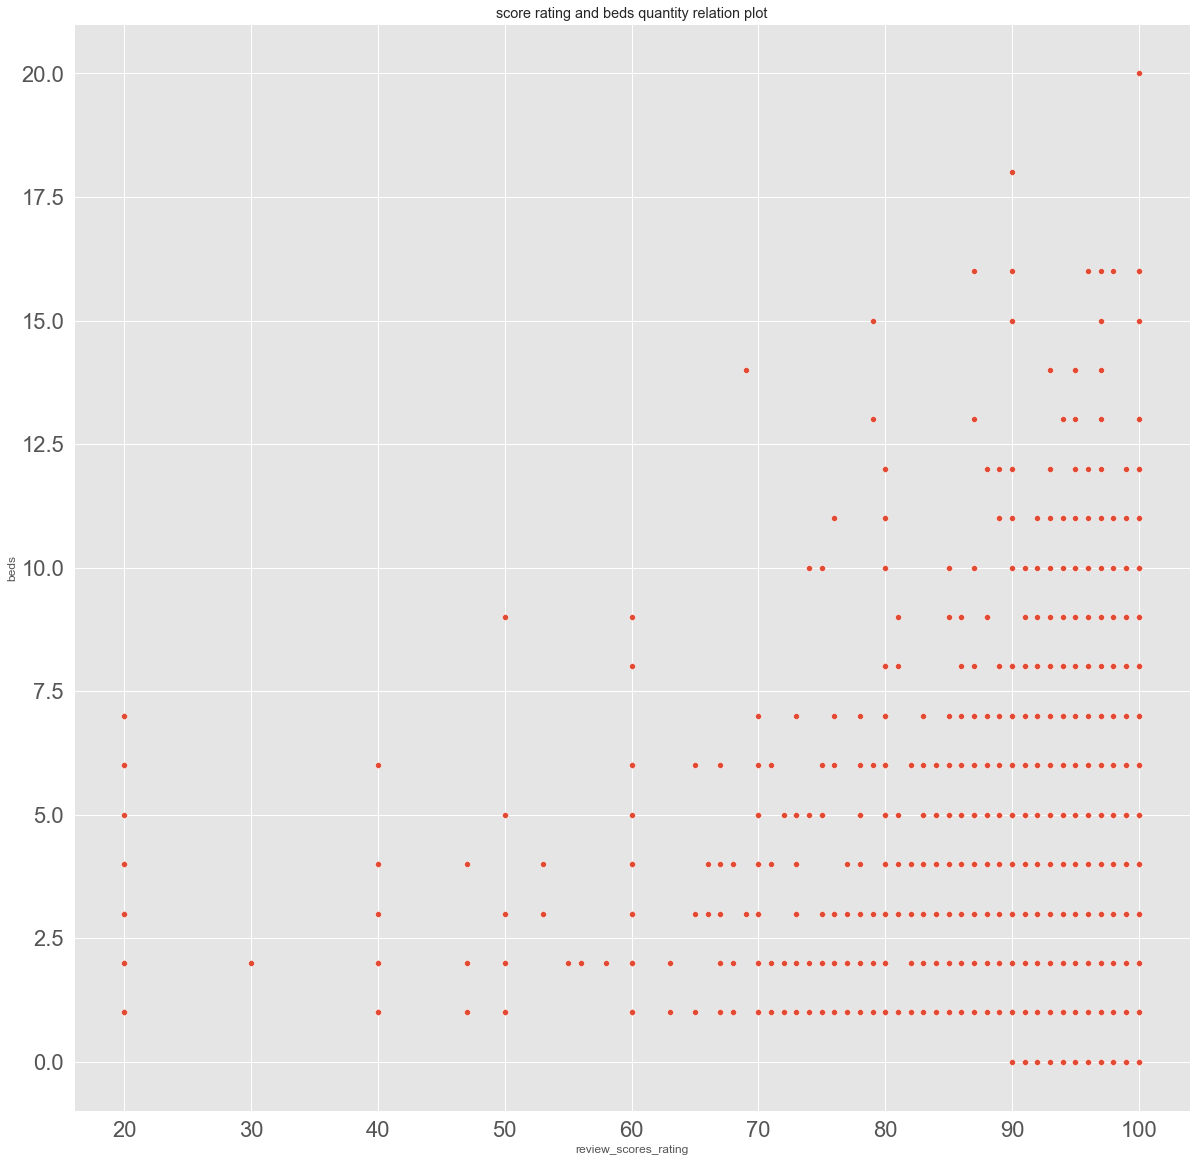

In [43]:
plt.figure(figsize = (20,20))
plt.title("score rating and beds quantity relation plot")
sns.set(font_scale = 2)
plt.style.use("ggplot")
sns.scatterplot(data = df_clean_list, x = "review_scores_rating", y = "beds")

<AxesSubplot:title={'center':'score rating and bathrooms quantity relation plot'}, xlabel='review_scores_rating', ylabel='bathrooms'>

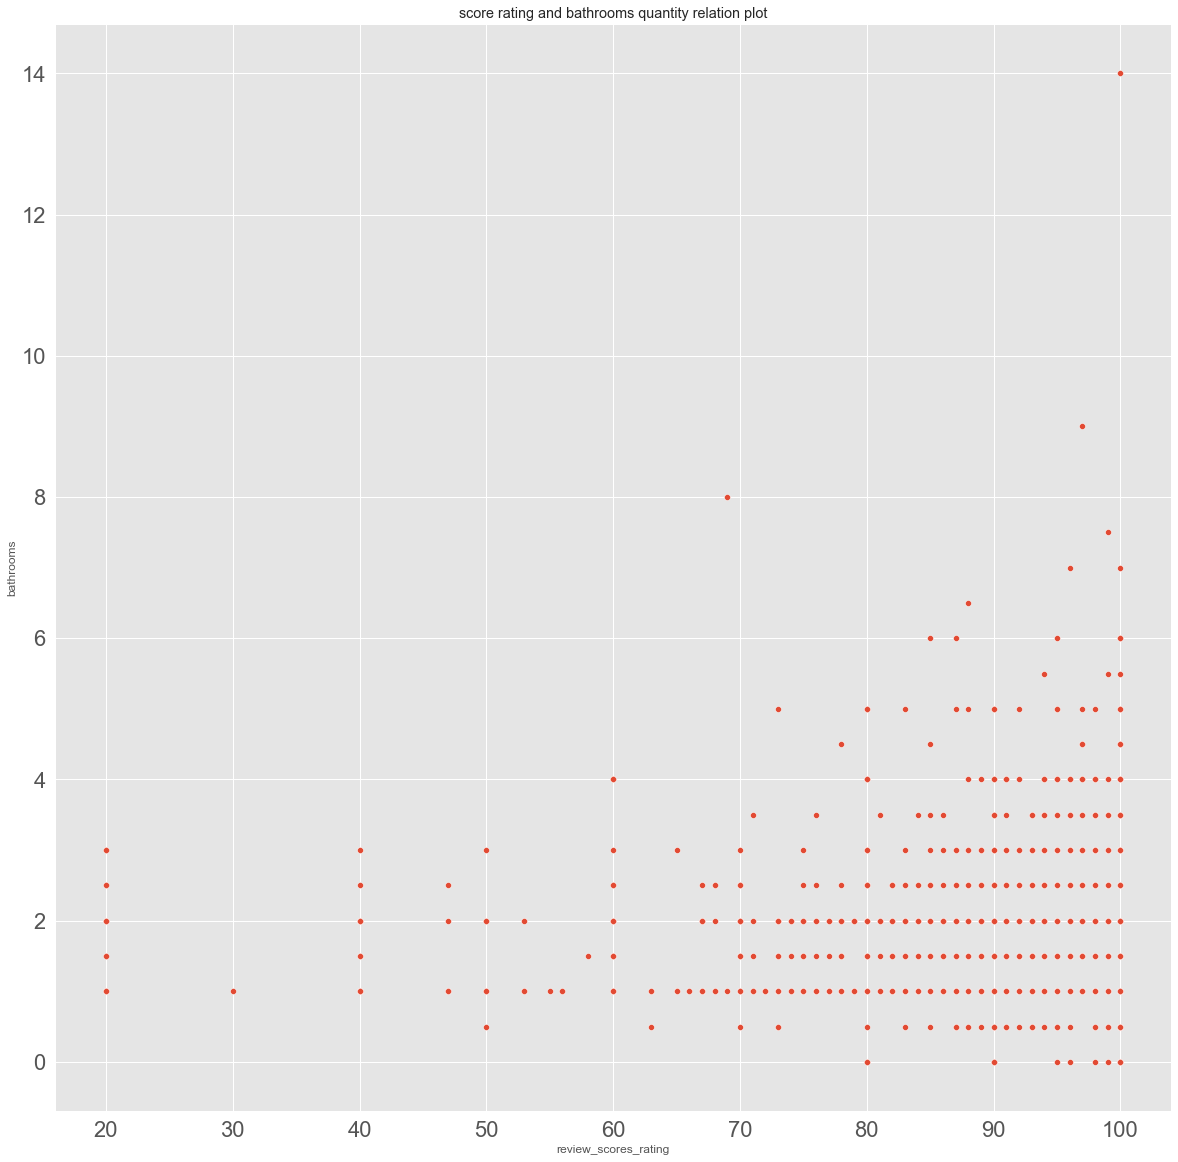

In [44]:
plt.figure(figsize = (20,20))
plt.title("score rating and bathrooms quantity relation plot")
sns.set(font_scale = 2)
plt.style.use("ggplot")
sns.scatterplot(data = df_clean_list, x = "review_scores_rating", y = "bathrooms")

<AxesSubplot:title={'center':'score rating and price of the houses relation plot'}, xlabel='review_scores_rating', ylabel='price'>

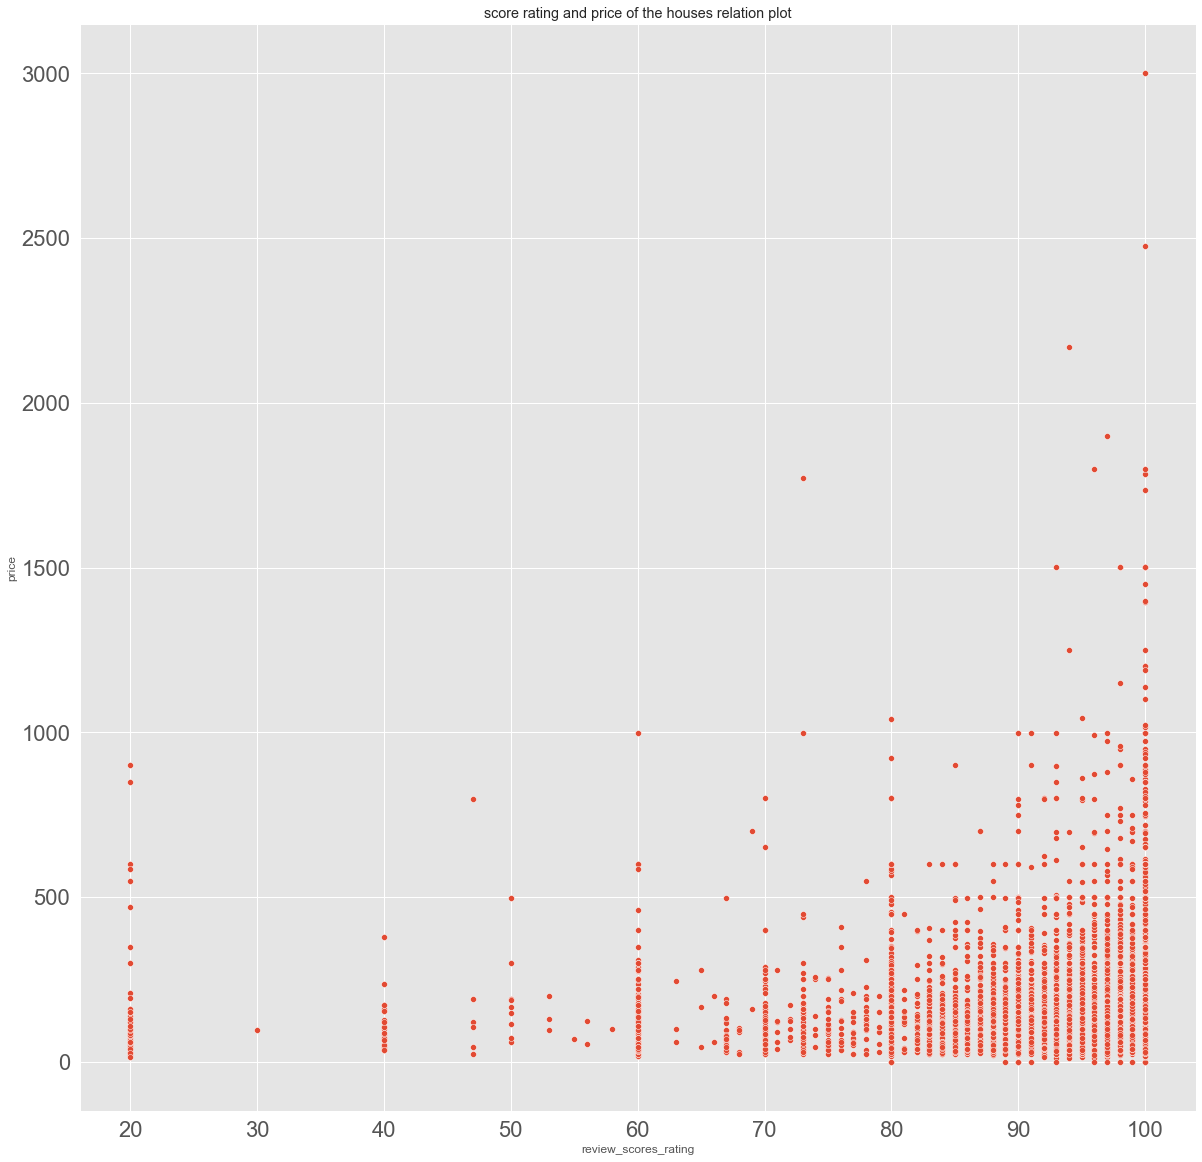

In [45]:
plt.figure(figsize = (20,20))
plt.title("score rating and price of the houses relation plot")
sns.set(font_scale = 2)
plt.style.use("ggplot")
sns.scatterplot(data = df_clean_list, x = "review_scores_rating", y = "price")

In [46]:
# text analysis

In [47]:
def language_detection(text):
    try:
        return detect(text)
    except:
        return None

In [48]:
df_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 486920 entries, 0 to 486919
Data columns (total 2 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   reviewer_name  486919 non-null  object
 1   comments       486317 non-null  object
dtypes: object(2)
memory usage: 7.4+ MB


In [49]:
df_reviews["language"] = df_reviews["comments"].apply(language_detection)
df_reviews.head()

,reviewer_name,comments,language
0,Miriam,"Very hospitable, much appreciated.\r\n",en
1,Michelle,A beautiful house in a lovely quiet neighbourh...,en
2,Karyn,This was my first time using airbnb and it was...,en
3,Rosalind,I was visiting Melbourne to spend time with my...,en
4,Johannes,It was very convenient to stay in Lindsay's a...,en


In [50]:
df_reviews["language"].value_counts()

en       457950
zh-cn      8721
ko         5106
fr         3237
de         1664
ro         1201
es         1019
so          913
af          872
it          504
ca          499
nl          457
ja          443
tl          262
cs          251
pt          243
zh-tw       233
cy          177
no          172
pl          170
vi          161
sv          136
da          133
sw          119
id          115
fi          111
hu          100
hr           76
et           68
sk           42
ru           38
sl           31
th           29
tr           26
lt            9
sq            4
el            3
ar            1
bg            1
lv            1
Name: language, dtype: int64

In [51]:
df_reviews_eng = df_reviews[(df_reviews["language"]== "en")]

In [52]:
df_reviews_eng["language"].value_counts()

en    457950
Name: language, dtype: int64

In [53]:
analyzer = SentimentIntensityAnalyzer()

In [54]:
def print_sentiment_scores(sentence):
    snt = analyzer.polarity_scores(sentence)
    print("{:-<40} {}".format(sentence, str(snt)))

In [55]:
# getting only the negative score
def negative_score(text):
    negative_value = analyzer.polarity_scores(text)['neg']
    return negative_value

# getting only the neutral score
def neutral_score(text):
    neutral_value = analyzer.polarity_scores(text)['neu']
    return neutral_value

# getting only the positive score
def positive_score(text):
    positive_value = analyzer.polarity_scores(text)['pos']
    return positive_value

# getting only the compound score
def compound_score(text):
    compound_value = analyzer.polarity_scores(text)['compound']
    return compound_value

In [56]:
df_reviews_eng['sentiment_neg'] = df_reviews_eng['comments'].apply(negative_score)
df_reviews_eng['sentiment_neu'] = df_reviews_eng['comments'].apply(neutral_score)
df_reviews_eng['sentiment_pos'] = df_reviews_eng['comments'].apply(positive_score)
df_reviews_eng['sentiment_compound'] = df_reviews_eng['comments'].apply(compound_score)

In [57]:
df_reviews_eng.head()

,reviewer_name,comments,language,sentiment_neg,sentiment_neu,sentiment_pos,sentiment_compound
0,Miriam,"Very hospitable, much appreciated.\r\n",en,0.000,0.457,0.543,0.5520
1,Michelle,A beautiful house in a lovely quiet neighbourh...,en,0.038,0.595,0.367,0.9788
2,Karyn,This was my first time using airbnb and it was...,en,0.000,0.740,0.260,0.9700
3,Rosalind,I was visiting Melbourne to spend time with my...,en,0.025,0.654,0.321,0.9882
4,Johannes,It was very convenient to stay in Lindsay's a...,en,0.000,0.723,0.277,0.9322


In [58]:
df_reviews_eng.to_csv('df_reviews_eng.csv', index = False)

In [59]:
df_reviews_eng2 = pd.read_csv("C:/Users/giese/Desktop/outros_projetos/Projetos-python/airbnb_melbourne/df_reviews_eng.csv", sep = ",")

In [60]:
df_reviews_eng2.head()

,reviewer_name,comments,language,sentiment_neg,sentiment_neu,sentiment_pos,sentiment_compound
0,Miriam,"Very hospitable, much appreciated.\r\n",en,0.000,0.457,0.543,0.5520
1,Michelle,A beautiful house in a lovely quiet neighbourh...,en,0.038,0.595,0.367,0.9788
2,Karyn,This was my first time using airbnb and it was...,en,0.000,0.740,0.260,0.9700
3,Rosalind,I was visiting Melbourne to spend time with my...,en,0.025,0.654,0.321,0.9882
4,Johannes,It was very convenient to stay in Lindsay's a...,en,0.000,0.723,0.277,0.9322


In [61]:
df_reviews_eng2.describe()

,sentiment_neg,sentiment_neu,sentiment_pos,sentiment_compound
count,457950.000000,457950.000000,457950.000000,457950.000000
mean,0.010722,0.620020,0.369251,0.836476
std,0.031438,0.164778,0.170217,0.234723
min,0.000000,0.000000,0.000000,-0.996400
25%,0.000000,0.526000,0.255000,0.817300
50%,0.000000,0.641000,0.349000,0.920200
75%,0.000000,0.731000,0.467000,0.963300
max,1.000000,1.000000,1.000000,0.999600


In [62]:
percentiles = df_reviews_eng2["sentiment_compound"].describe(percentiles = [.05, .1, .2, .3, .4, .5,
                                                                         .6, .7, .8, .9])
percentiles

count    457950.000000
mean          0.836476
std           0.234723
min          -0.996400
5%            0.421500
10%           0.623900
20%           0.778300
30%           0.848100
40%           0.892800
50%           0.920200
60%           0.941100
70%           0.956700
80%           0.969600
90%           0.981000
max           0.999600
Name: sentiment_compound, dtype: float64

In [63]:
neg = percentiles['5%']
mid = percentiles['20%']
pos = percentiles['max']
names = ['Negative Comments', 'Neutral Comments','Positive Comments']
size = [neg, mid, pos]

([<matplotlib.patches.Wedge at 0x146efcbea00>,
 [Text(0.9065847798733295, 0.6229799650887875, 'Negative Comments'),
  Text(-0.7458063868830997, 0.8085622012463706, 'Neutral Comments'),
  Text(0.15674424288723787, -1.0887751109947852, 'Positive Comments')],
 [Text(0.41208399085151337, 0.2831727114039943, '19.16%'),
  Text(-0.3390029031286817, 0.3675282732938048, '35.39%'),
  Text(0.07124738313056267, -0.4948977777249023, '45.45%')])

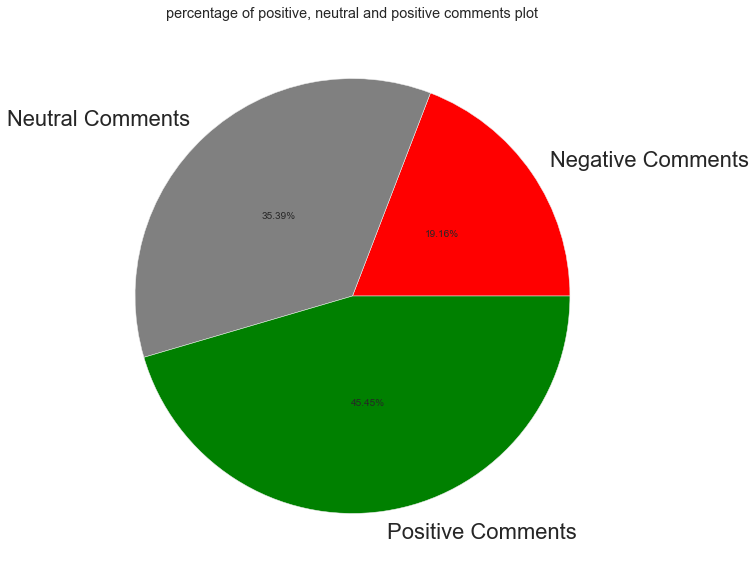

In [64]:
plt.figure(figsize = (10,10))
plt.title("percentage of positive, neutral and positive comments plot")
plt.pie(size, labels = names, colors = ['red', 'gray', 'green'], 
        autopct='%.2f%%', pctdistance = 0.5)